# Chronic Kidney Disease classification 

In [1]:
# pip install --user scikit-learn==1.2.2

## Importing necessary libraries

In [2]:
# Importing library for ignoring warning output
import warnings
warnings.filterwarnings('ignore')

# Importing libraries for maths and visualization
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import gradio as gr
#  Importing classifiers
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression

## Loading dataset

In [3]:
data = pd.read_csv('uncleaned_dataset.csv')
data.head() 

,Unnamed: 0,age,bp,sg,al,su,rbc,pc,pcc,ba,...,wc,rc,htn,dm,cad,appet,pe,ane,classification,Gender
0,0,66.0,61.0,1.011,2.0,1.0,abnormal,abnormal,present,present,...,8800.0,1.9,yes,yes,yes,good,yes,yes,ckd,M
1,1,52.0,73.0,1.012,0.0,0.0,normal,normal,present,present,...,4800.0,5.3,no,no,yes,good,yes,yes,ckd,M
2,2,57.0,72.0,1.012,0.0,0.0,normal,normal,present,present,...,7600.0,3.7,yes,yes,yes,good,yes,yes,ckd,M
3,3,62.0,73.0,1.009,2.0,1.0,normal,abnormal,present,present,...,7600.0,5.1,yes,yes,yes,good,yes,yes,ckd,M
4,4,71.0,70.0,1.015,0.0,1.0,normal,normal,present,present,...,7200.0,1.0,yes,yes,yes,good,yes,yes,ckd,F


In [4]:
# data['wc'].describe()

In [5]:
data.columns

Index(['Unnamed: 0', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba',
       'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm',
       'cad', 'appet', 'pe', 'ane', 'classification', 'Gender'],
      dtype='object')

## Data preprocessing

In [6]:
#  length of dataframe
len(data)

9169

In [7]:
# drop if duplicated data exist
data.drop_duplicates()
len(data)

9169

In [8]:
#  droping class

data = data.drop(data.columns[:1], axis=1)
data = data.drop('classification', axis = 1)
data.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,Gender
0,66.0,61.0,1.011,2.0,1.0,abnormal,abnormal,present,present,230.0,...,11.0,8800.0,1.9,yes,yes,yes,good,yes,yes,M
1,52.0,73.0,1.012,0.0,0.0,normal,normal,present,present,78.0,...,7.0,4800.0,5.3,no,no,yes,good,yes,yes,M
2,57.0,72.0,1.012,0.0,0.0,normal,normal,present,present,116.0,...,9.0,7600.0,3.7,yes,yes,yes,good,yes,yes,M
3,62.0,73.0,1.009,2.0,1.0,normal,abnormal,present,present,230.0,...,10.0,7600.0,5.1,yes,yes,yes,good,yes,yes,M
4,71.0,70.0,1.015,0.0,1.0,normal,normal,present,present,237.0,...,5.0,7200.0,1.0,yes,yes,yes,good,yes,yes,F


In [9]:
#  data types
data.dtypes

age       float64
bp        float64
sg        float64
al        float64
su        float64
rbc        object
pc         object
pcc        object
ba         object
bgr       float64
bu        float64
sc        float64
sod       float64
pot       float64
hemo      float64
pcv       float64
wc        float64
rc        float64
htn        object
dm         object
cad        object
appet      object
pe         object
ane        object
Gender     object
dtype: object

In [10]:
#  data cleaning using regular expressions
data=data.replace(to_replace=[r"\\t|\\n|\\r", "\t|\n|\r"], value=["",""], regex=True)
data=data.replace("[!@#$%^&*()''?]","",regex=True)
data=data.replace('', np.nan)
data = data.replace(r'^\s*$', np.nan, regex=True)

In [11]:
data.head()


,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,Gender
0,66.0,61.0,1.011,2.0,1.0,abnormal,abnormal,present,present,230.0,...,11.0,8800.0,1.9,yes,yes,yes,good,yes,yes,M
1,52.0,73.0,1.012,0.0,0.0,normal,normal,present,present,78.0,...,7.0,4800.0,5.3,no,no,yes,good,yes,yes,M
2,57.0,72.0,1.012,0.0,0.0,normal,normal,present,present,116.0,...,9.0,7600.0,3.7,yes,yes,yes,good,yes,yes,M
3,62.0,73.0,1.009,2.0,1.0,normal,abnormal,present,present,230.0,...,10.0,7600.0,5.1,yes,yes,yes,good,yes,yes,M
4,71.0,70.0,1.015,0.0,1.0,normal,normal,present,present,237.0,...,5.0,7200.0,1.0,yes,yes,yes,good,yes,yes,F


In [12]:
data.isnull().sum()

age       140
bp         18
sg         94
al          3
su         39
rbc        85
pc         23
pcc       122
ba         21
bgr       120
bu         66
sc         10
sod        13
pot       145
hemo       28
pcv        14
wc         57
rc         81
htn         6
dm          5
cad       144
appet      98
pe         86
ane       104
Gender     38
dtype: int64

## Dealing with Null values

In [13]:
from sklearn.impute import SimpleImputer
def imputing(data):
    for i in data.columns:
        if data[i].isnull().sum()!=0:

            if data[i].dtype == 'float64' or data[i].dtype == 'int64': # impute integer columns with mean
                imputer = SimpleImputer(missing_values=np.NaN, strategy='mean')

                data[i] = imputer.fit_transform(data[i].values.reshape(-1,1))[:,0]
            else: # impute categorical columns with most frequent
                imputer = SimpleImputer(missing_values=np.NaN, strategy='most_frequent')

                data[i] = imputer.fit_transform(data[i].values.reshape(-1,1))[:,0]
    return data


In [14]:
Imputed_data = imputing(data)

In [15]:
Imputed_data.isnull().sum()

age       0
bp        0
sg        0
al        0
su        0
rbc       0
pc        0
pcc       0
ba        0
bgr       0
bu        0
sc        0
sod       0
pot       0
hemo      0
pcv       0
wc        0
rc        0
htn       0
dm        0
cad       0
appet     0
pe        0
ane       0
Gender    0
dtype: int64

In [16]:
# for i in Imputed_data.columns:
#     if Imputed_data[i].dtype==object:
#         print(i)
#         print(Imputed_data[i].value_counts())

In [17]:
data = Imputed_data

## Feature Engineering

#### Adding column to dataframe

In [18]:
# calculate Gfr for male and female

male = 142 *  pow(np.array( [min(i,1) for i in list(data['sc']/0.9)]),-0.302)* pow(np.array([max(i,1) for i in list(data['sc']/0.9)]),-1.200)* 0.9938 ** np.array(data['age']).astype(float)


female = 142 *  pow(np.array( [min(i,1) for i in list(data['sc']/0.7)]),-0.241)* pow(np.array([max(i,1) for i in list(data['sc']/0.7)]),-1.200)* 0.9938 ** np.array(data['age']).astype(float)* 1.012 

In [19]:
#  add Gfr column to dataframe
conditions = [
    data['Gender'].eq('M') ,
    data['Gender'].eq('F') 
]

choices = [male,female]
data['GFR'] = np.select(conditions, choices,default=0)

In [20]:
data.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,wc,rc,htn,dm,cad,appet,pe,ane,Gender,GFR
0,66.0,61.0,1.011,2.0,1.0,abnormal,abnormal,present,present,230.0,...,8800.0,1.9,yes,yes,yes,good,yes,yes,M,19.810531
1,52.0,73.0,1.012,0.0,0.0,normal,normal,present,present,78.0,...,4800.0,5.3,no,no,yes,good,yes,yes,M,51.520846
2,57.0,72.0,1.012,0.0,0.0,normal,normal,present,present,116.0,...,7600.0,3.7,yes,yes,yes,good,yes,yes,M,34.081187
3,62.0,73.0,1.009,2.0,1.0,normal,abnormal,present,present,230.0,...,7600.0,5.1,yes,yes,yes,good,yes,yes,M,39.392411
4,71.0,70.0,1.015,0.0,1.0,normal,normal,present,present,237.0,...,7200.0,1.0,yes,yes,yes,good,yes,yes,F,53.720957


In [21]:
# Label data based GFR values

conditions = [
    data['GFR'].ge(90) ,
    data['GFR'].between(60,89),
    data['GFR'].between(30,59),
    data['GFR'].between(15,29),
    data['GFR'].le(15)    
]

choices = ['Normal','Mild','Moderate','Severe','ESRD']

data['classification'] = np.select(conditions, choices)

In [22]:
data.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,rc,htn,dm,cad,appet,pe,ane,Gender,GFR,classification
0,66.0,61.0,1.011,2.0,1.0,abnormal,abnormal,present,present,230.0,...,1.9,yes,yes,yes,good,yes,yes,M,19.810531,Severe
1,52.0,73.0,1.012,0.0,0.0,normal,normal,present,present,78.0,...,5.3,no,no,yes,good,yes,yes,M,51.520846,Moderate
2,57.0,72.0,1.012,0.0,0.0,normal,normal,present,present,116.0,...,3.7,yes,yes,yes,good,yes,yes,M,34.081187,Moderate
3,62.0,73.0,1.009,2.0,1.0,normal,abnormal,present,present,230.0,...,5.1,yes,yes,yes,good,yes,yes,M,39.392411,Moderate
4,71.0,70.0,1.015,0.0,1.0,normal,normal,present,present,237.0,...,1.0,yes,yes,yes,good,yes,yes,F,53.720957,Moderate


In [23]:
data['wc'].max()

62400.0

## checking for outliers 

<Axes: >

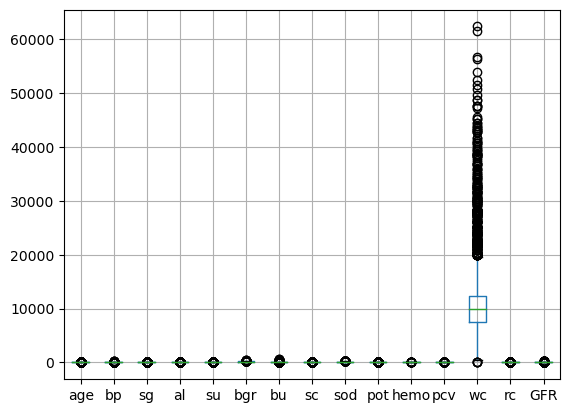

In [24]:
### Plot outliers for each numerical feature
data.boxplot()

In [25]:
#  we will use tukey method to deal with outliers

## Label encoding

In [26]:
# encoding
data['pc'] = data['pc'].replace(['normal','abnormal'],[0,1])
data['rbc'] = data['rbc'].replace(['normal','abnormal'],[0,1])
data['pcc'] = data['pcc'].replace(['present','notpresent'],[0,1])
data['ba'] = data['ba'].replace(['present','notpresent'],[0,1])
data['htn'] = data['htn'].replace(['yes','no'],[0,1])
data['dm'] = data['dm'].replace(['yes','no'],[0,1])
data['cad'] = data['cad'].replace(['yes','no'],[0,1])
data['appet'] = data['appet'].replace(['good','poor'],[0,1])
data['pe'] = data['pe'].replace(['yes','no'],[0,1])
data['ane'] = data['ane'].replace(['yes','no'],[0,1])
data['classification'] = data['classification'].replace(['Normal','Mild','Moderate','Severe','ESRD'],[1,2,3,4,5])
data['Gender'] = data['Gender'].replace(['M','F'],[0,1])
# data.classification = data.classification.map({ 'Normal':1,'Mild':2,'Moderate ':3,'Severe':4,'ESRD':5})
data.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,rc,htn,dm,cad,appet,pe,ane,Gender,GFR,classification
0,66.0,61.0,1.011,2.0,1.0,1,1,0,0,230.0,...,1.9,0,0,0,0,0,0,0,19.810531,4
1,52.0,73.0,1.012,0.0,0.0,0,0,0,0,78.0,...,5.3,1,1,0,0,0,0,0,51.520846,3
2,57.0,72.0,1.012,0.0,0.0,0,0,0,0,116.0,...,3.7,0,0,0,0,0,0,0,34.081187,3
3,62.0,73.0,1.009,2.0,1.0,0,1,0,0,230.0,...,5.1,0,0,0,0,0,0,0,39.392411,3
4,71.0,70.0,1.015,0.0,1.0,0,0,0,0,237.0,...,1.0,0,0,0,0,0,0,1,53.720957,3


In [27]:
## check for class balance
data.classification.value_counts()

4    3276
3    3075
1    1164
2     781
5     618
0     255
Name: classification, dtype: int64

In [28]:
# check class types
data['classification'].explode().unique()

array([4, 3, 2, 5, 1, '0'], dtype=object)

In [29]:
# drop unwanted class type
data=data.drop(data[data.classification =='0'].index) 
data.classification.value_counts()

4    3276
3    3075
1    1164
2     781
5     618
Name: classification, dtype: int64

In [30]:
# length of dataset after preprocessing
# len(data)

## Dealing with class imbalance

#### Creating synthetic data using SMOTE( Synthetic Minority Over-sampling Technique)

In [31]:
len(data)

8914

In [32]:
# !pip install imbalanced-learn

In [33]:
# remove if infintiy exist
data = data.dropna()

data = data.fillna(0)

data= data[np.isfinite(data).all(1)]

In [34]:
len(data)

8861

In [35]:
X_smote =  data.loc[:, "age":"GFR":1]
y_smote =  data.classification



In [36]:
# len(X )

In [37]:
# len(y)

In [38]:
# # remove infinity

# for i in X.columns:
#     X[i] = X[i].astype(int)


In [39]:
# # for i in y.columns:
# y.head()

In [40]:
from imblearn.over_sampling import SMOTE
from collections import Counter

X_resampled, y_resampled = SMOTE().fit_resample(X_smote, y_smote)

X_resampled['classification'] = y_resampled

In [41]:
X_resampled

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,rc,htn,dm,cad,appet,pe,ane,Gender,GFR,classification
0,66.000000,61.000000,1.011000,2.000000,1.000000,1,1,0,0,230.000000,...,1.900000,0,0,0,0,0,0,0,19.810531,4
1,52.000000,73.000000,1.012000,0.000000,0.000000,0,0,0,0,78.000000,...,5.300000,1,1,0,0,0,0,0,51.520846,3
2,57.000000,72.000000,1.012000,0.000000,0.000000,0,0,0,0,116.000000,...,3.700000,0,0,0,0,0,0,0,34.081187,3
3,62.000000,73.000000,1.009000,2.000000,1.000000,0,1,0,0,230.000000,...,5.100000,0,0,0,0,0,0,0,39.392411,3
4,71.000000,70.000000,1.015000,0.000000,1.000000,0,0,0,0,237.000000,...,1.000000,0,0,0,0,0,0,1,53.720957,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16375,46.042790,91.042790,1.007000,3.000000,1.000000,0,1,0,0,204.229775,...,28.538511,0,0,0,0,0,0,0,12.949083,5
16376,43.782212,127.346636,1.007782,5.000000,0.000000,1,1,0,0,80.635110,...,46.042645,0,0,0,1,1,0,0,6.888819,5
16377,38.636845,95.819306,1.012182,3.636257,0.181872,1,1,0,0,119.548559,...,39.544025,0,0,0,0,0,0,0,13.887771,5
16378,49.760817,82.892494,1.000551,1.000000,0.778499,0,1,0,0,38.586627,...,18.457647,0,0,0,0,0,0,0,2.570233,5


### Rename columns to clarify abbreviations and to show full names on plots

In [42]:
data = X_resampled.rename(columns={'bp': 'blood_pressure','sg': 'specific_gravity','al': 'albumin','su': 'sugar',
                   'rbc': 'red_blood_cells','pc': 'pus_cell','pcc': 'pus_cell_clumps','ba': 'bacteria',
                   'bgr': 'blood_glucose_random','bu': 'blood_urea','sc': 'serum_creatinine',
                   'sod': 'sodium','pot': 'potassium','hemo': 'hemoglobin','pcv': 'packed_cell_volume',
                   'wc': 'white_blood_cell','rc': 'red_blood_cell','htn': 'hypertension','dm': 'diabetes_mellitus',
                   'cad': 'coronary_artery_disease','appet': 'appetite','pe': 'pedal_edema','ane': 'anemia'})


In [43]:
### Coerce numerical values from string to float
data['white_blood_cell'] = pd.to_numeric(data['white_blood_cell'], errors='coerce')
data['red_blood_cell'] = pd.to_numeric(data['red_blood_cell'], errors='coerce')

In [44]:
data.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,red_blood_cell,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,pedal_edema,anemia,Gender,GFR,classification
0,66.0,61.0,1.011,2.0,1.0,1,1,0,0,230.0,...,1.9,0,0,0,0,0,0,0,19.810531,4
1,52.0,73.0,1.012,0.0,0.0,0,0,0,0,78.0,...,5.3,1,1,0,0,0,0,0,51.520846,3
2,57.0,72.0,1.012,0.0,0.0,0,0,0,0,116.0,...,3.7,0,0,0,0,0,0,0,34.081187,3
3,62.0,73.0,1.009,2.0,1.0,0,1,0,0,230.0,...,5.1,0,0,0,0,0,0,0,39.392411,3
4,71.0,70.0,1.015,0.0,1.0,0,0,0,0,237.0,...,1.0,0,0,0,0,0,0,1,53.720957,3


In [45]:
data.columns

Index(['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
       'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'hemoglobin', 'packed_cell_volume', 'white_blood_cell',
       'red_blood_cell', 'hypertension', 'diabetes_mellitus',
       'coronary_artery_disease', 'appetite', 'pedal_edema', 'anemia',
       'Gender', 'GFR', 'classification'],
      dtype='object')

In [46]:
# check how many null values are in the data set
data.isnull().sum()

age                        0
blood_pressure             0
specific_gravity           0
albumin                    0
sugar                      0
red_blood_cells            0
pus_cell                   0
pus_cell_clumps            0
bacteria                   0
blood_glucose_random       0
blood_urea                 0
serum_creatinine           0
sodium                     0
potassium                  0
hemoglobin                 0
packed_cell_volume         0
white_blood_cell           0
red_blood_cell             0
hypertension               0
diabetes_mellitus          0
coronary_artery_disease    0
appetite                   0
pedal_edema                0
anemia                     0
Gender                     0
GFR                        0
classification             0
dtype: int64

In [47]:
#  further data checking
data.describe()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,red_blood_cell,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,pedal_edema,anemia,Gender,GFR,classification
count,16380.000000,16380.000000,16380.000000,16380.000000,16380.000000,16380.000000,16380.000000,16380.000000,16380.000000,16380.000000,...,16380.000000,16380.000000,16380.000000,16380.000000,16380.000000,16380.000000,16380.000000,16380.000000,16380.000000,16380.000000
mean,51.155792,75.881998,1.011591,1.048681,0.469936,0.169475,0.386874,0.034554,0.023382,146.936200,...,11.860027,0.070269,0.061294,0.015934,0.035592,0.020757,0.021062,0.357753,53.191150,3.000000
std,13.460753,18.333893,0.006206,1.193616,0.752714,0.375182,0.487049,0.182654,0.151119,65.062366,...,12.406489,0.255607,0.239877,0.125224,0.185277,0.142574,0.143596,0.479354,42.393815,1.414257
min,6.000000,40.000000,0.993000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.310965,1.000000
25%,44.000000,66.478489,1.009720,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,...,3.400000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,19.522717,2.000000
50%,53.000000,73.000000,1.013000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,136.000000,...,7.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,44.117888,3.000000
75%,61.551424,81.128433,1.015000,1.216344,1.000000,0.000000,1.000000,0.000000,0.000000,194.000000,...,17.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,73.654627,4.000000
max,75.000000,220.000000,1.027000,10.000000,5.000000,1.000000,1.000000,1.000000,1.000000,484.000000,...,93.800000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,200.315852,5.000000


### Find and remove outliers

An assumption of binary logistic regression is there should be no outliers in the data

In [48]:
def findOutliers(col):
    
    # Calculate the first quartile
    Q1 = data[col].quantile(.25)

    # Calculate the third quartile
    Q3 = data[col].quantile(.75)

    # Calculate the interquartile range Q3 - Q1
    IQR = Q3 - Q1
    IQR

    # Calculate the maximum value and minimum values according to the Tukey rule
    # max_value is Q3 + 1.5 * IQR while min_value is Q1 - 1.5 * IQR

    max_value = Q3 + 1.5 * IQR
    min_value = Q1 - 1.5 * IQR

    # Filter the training data for values that are greater than max_value or less than min_value
    outliers = data[(data[col] > max_value) | (data[col] < min_value)]
    return outliers


In [49]:
### We want to find outliers in each feature column except those with classification values
#### Let's identify features which are categorical by the value counts of each column

In [50]:
# for col in data.columns:
#     feat_count = len(data[col].value_counts())
#     print('{}: {}'.format(col, feat_count))

<!-- ### Non-Categorical
- 'age_filled', 
- 'blood_glucose_random'
- 'blood_urea'
- 'serum_creatinine'
- 'hemoglobin'
- 'white_blood_cell'
- 'red_blood_cell'
- 'blood_pressure',
- 'sodium'
- 'potassium'
- 'packed_cell_volume'


### Categorical
- 'specific_gravity',
- 'albumin',
- 'sugar', 
- 'red_blood_cells',
- 'pus_cell', 
- 'pus_cell_clumps', 
- 'bacteria'
- 'hypertension'
- 'diabetes_mellitus',
- 'coronary_artery_disease', 
- 'appetite', 
- 'pedal_edema', 
- 'anemia' -->

In [51]:
# Outliers to be removed for the logistic regression model
age_outliers = findOutliers('age')
bgr_outliers = findOutliers('blood_glucose_random')
bu_outliers = findOutliers('blood_urea')
sc_outliers = findOutliers('serum_creatinine')
hem_outliers = findOutliers('hemoglobin')
wbc_outliers = findOutliers('white_blood_cell')
rbc_outliers = findOutliers('red_blood_cell')
bp_outliers = findOutliers('blood_pressure')
sod_outliers = findOutliers('sodium')
pot_outliers = findOutliers('potassium')
pcv_outliers = findOutliers('packed_cell_volume')

### Outliers to be removed for the logistic regression model
Merge outlier dfs and remove all rows from new_df in one go
Compile the list of dataframes to be merged

In [52]:
all_outliers = [age_outliers,
                bgr_outliers,
                bu_outliers,
                sc_outliers,
                hem_outliers,
                wbc_outliers,
                rbc_outliers,
                bp_outliers,
                sod_outliers,
                pot_outliers,
                pcv_outliers
                ]

In [53]:
df_outliers = pd.concat(all_outliers)

### Most outliers are classified as having chronic kidney disease
This could indicate the importance of keeping these patients in the dataset.

In [54]:
len(df_outliers)

8628

In [55]:
df_outliers.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,red_blood_cell,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,pedal_edema,anemia,Gender,GFR,classification
343,7.0,127.0,1.012,1.0,2.0,1,0,0,1,128.0,...,46.8,0,0,0,0,0,0,0,4.800084,5
359,6.0,157.0,1.011,2.0,1.0,0,0,0,1,16.0,...,56.9,0,0,0,0,1,0,0,3.833588,5
1272,12.0,153.0,1.003,9.0,2.0,0,1,0,0,283.0,...,80.7,0,0,0,1,0,1,0,27.717275,4
1380,14.0,131.0,1.012,1.0,2.0,1,1,0,1,107.0,...,43.6,0,0,0,0,0,0,0,4.832942,5
2216,9.0,171.0,1.010,3.0,0.0,0,0,0,1,110.0,...,61.6,0,0,0,0,0,0,0,5.604099,5


## Create a dataframe with the outliers removed
A major assumption of using binary logistic regression is that there should be no outliers in the data

In [56]:
df_outliers_removed = data.drop(df_outliers.index).reset_index(drop=True)
len(df_outliers_removed) 

13052

### Check whether the target data is balanced
Does the patient have chronic kidney disease or not?


In [57]:
df_outliers_removed.classification.value_counts()


1    3220
3    3179
4    3141
2    2909
5     603
Name: classification, dtype: int64

<Axes: >

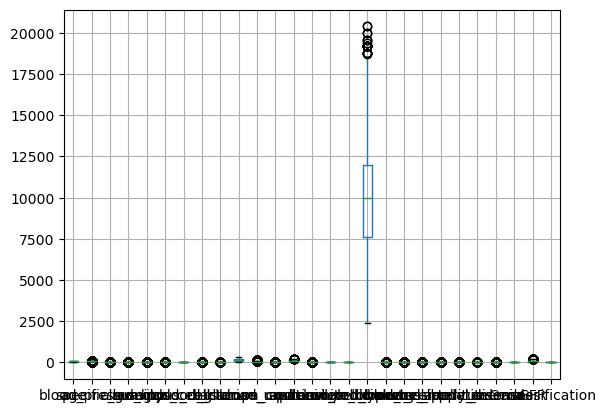

In [58]:
df_outliers_removed.boxplot()

## Correlations

### Create a heat map of df_outliers_removed
The results will be used to further check feature and target relationships

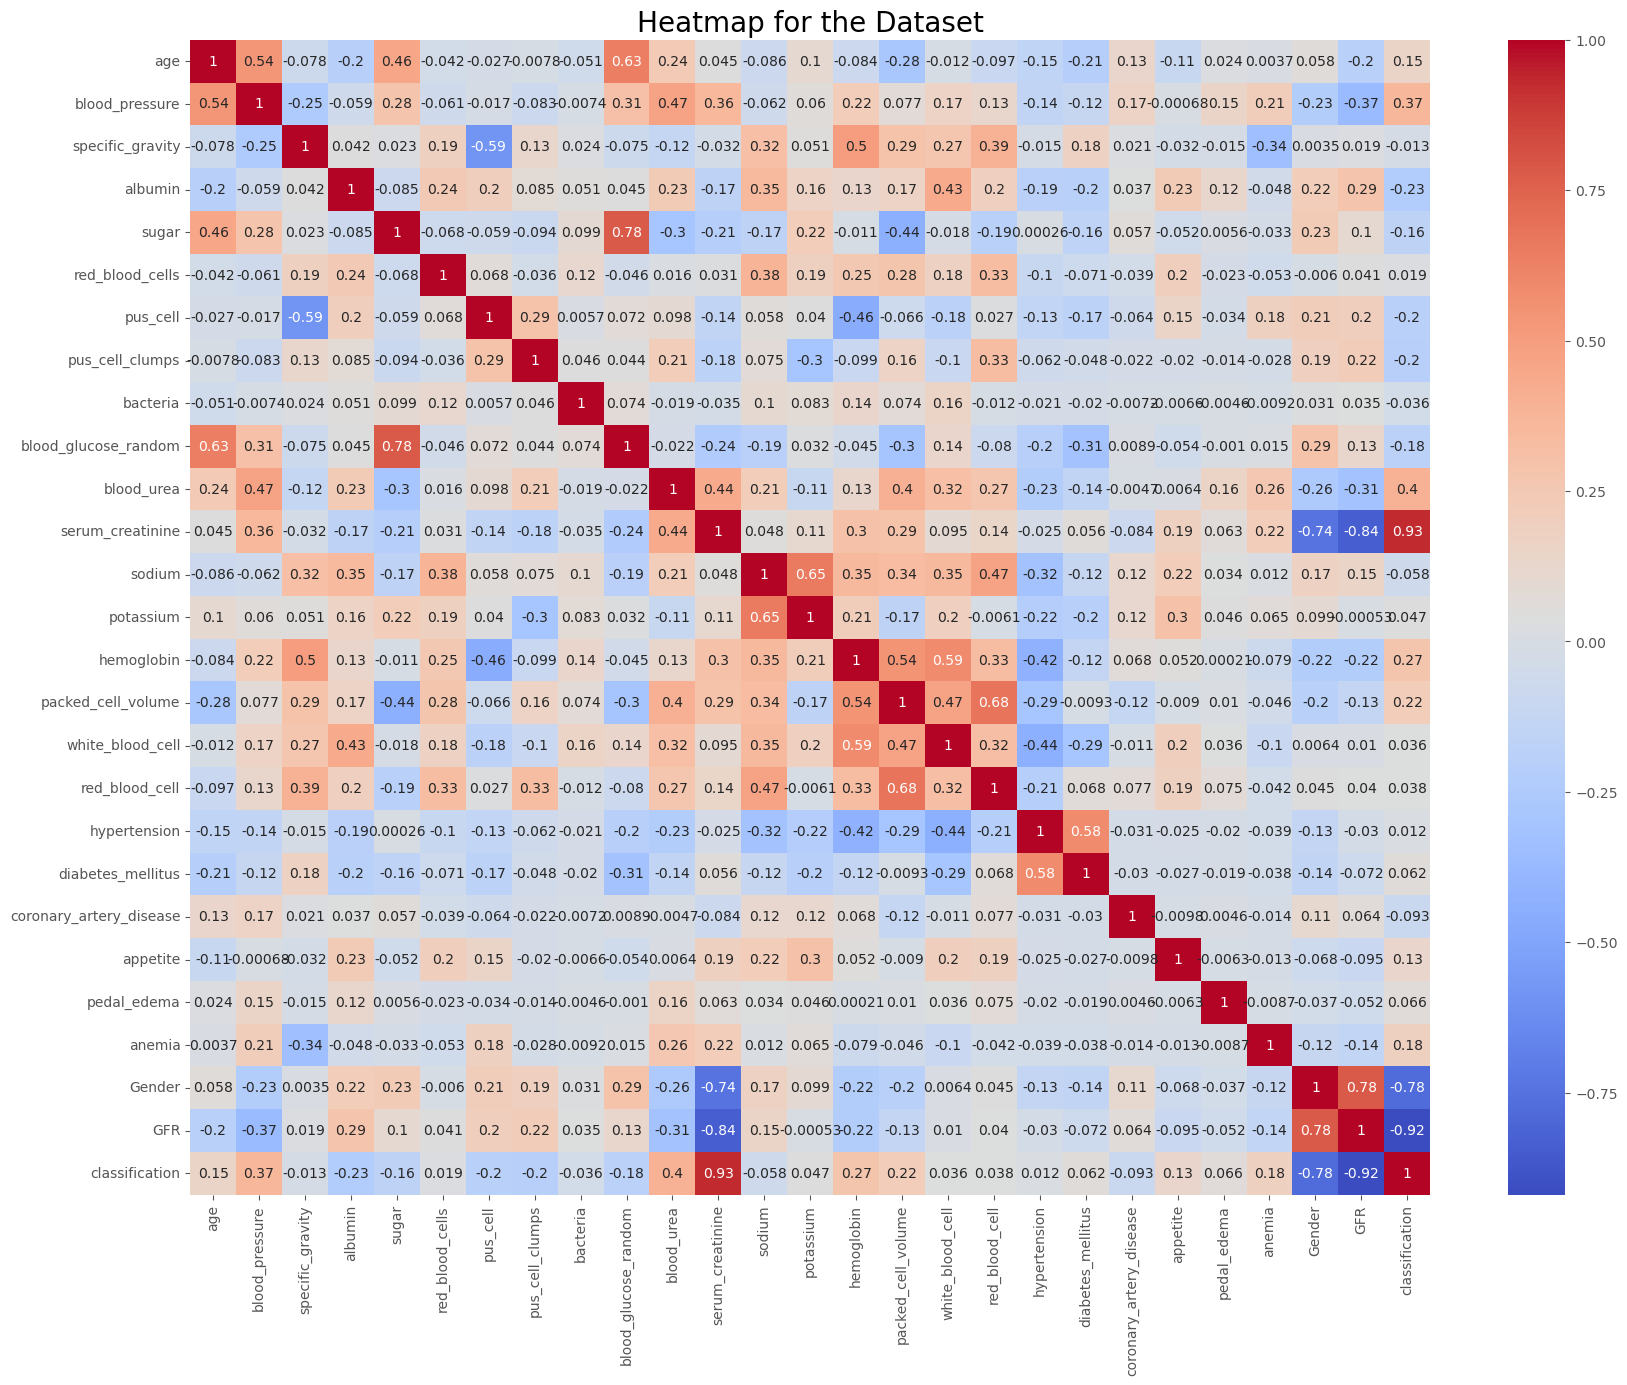

In [59]:
plt.rcParams['figure.figsize'] = (20, 15)
plt.style.use('ggplot')

sns.heatmap(df_outliers_removed.corr(), annot = True, cmap = 'coolwarm')
plt.title('Heatmap for the Dataset', fontsize = 20)
plt.show()

### Relationship between 'packed cell volume' and 'hemoglobin'

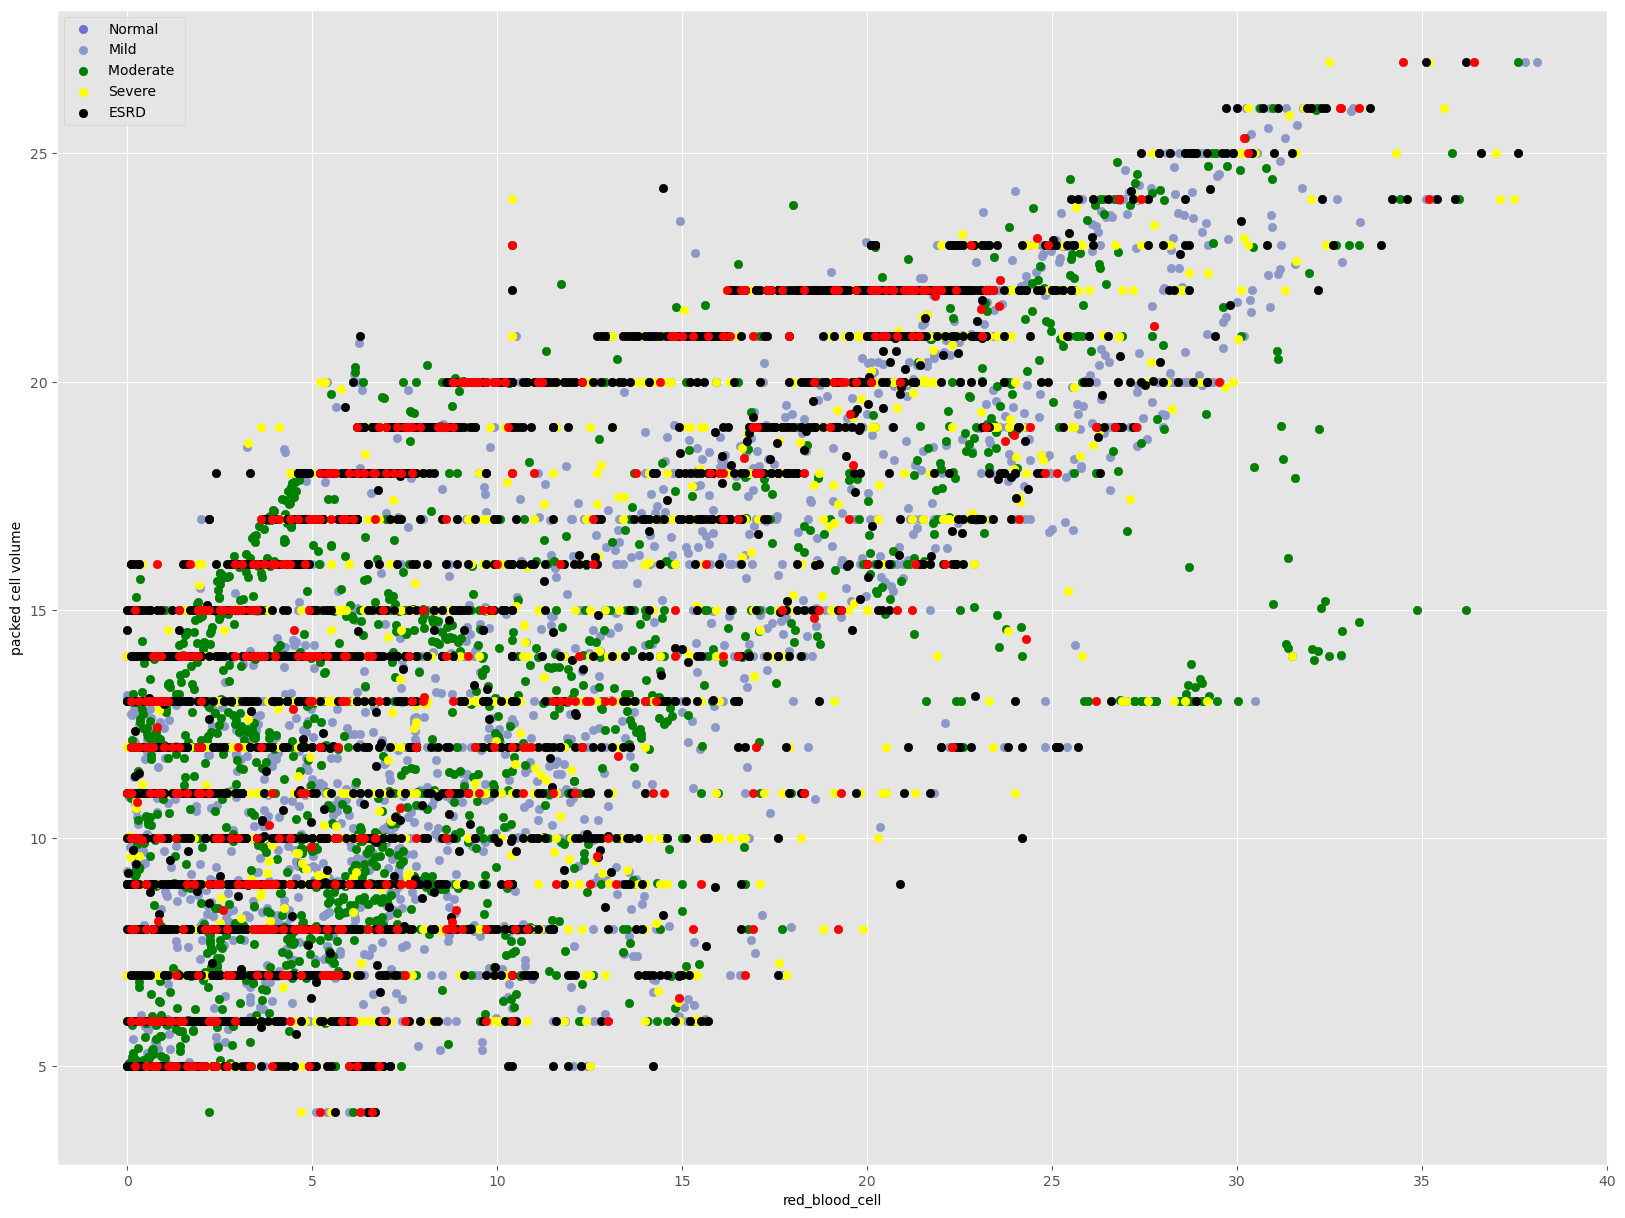

In [60]:
plt.scatter(x=df_outliers_removed.red_blood_cell[data.classification==0], y=df_outliers_removed.packed_cell_volume[(data.classification==0)], c="#7070cc")
plt.scatter(x=df_outliers_removed.red_blood_cell[data.classification==1], y=df_outliers_removed.packed_cell_volume[(data.classification==1)], c="#8c99c8")
plt.scatter(x=df_outliers_removed.red_blood_cell[data.classification==2], y=df_outliers_removed.packed_cell_volume[(data.classification==2)], c="green")
plt.scatter(x=df_outliers_removed.red_blood_cell[data.classification==3], y=df_outliers_removed.packed_cell_volume[(data.classification==3)], c="yellow")
plt.scatter(x=df_outliers_removed.red_blood_cell[data.classification==4], y=df_outliers_removed.packed_cell_volume[(data.classification==4)], c="black")
plt.scatter(x=df_outliers_removed.red_blood_cell[data.classification==5], y=df_outliers_removed.packed_cell_volume[(data.classification==5)], c="red")
plt.legend(['Normal','Mild','Moderate ','Severe','ESRD'])
plt.xlabel("red_blood_cell")
plt.ylabel("packed cell volume")
plt.show()

### The relationship between 'serum creatinine' and the target

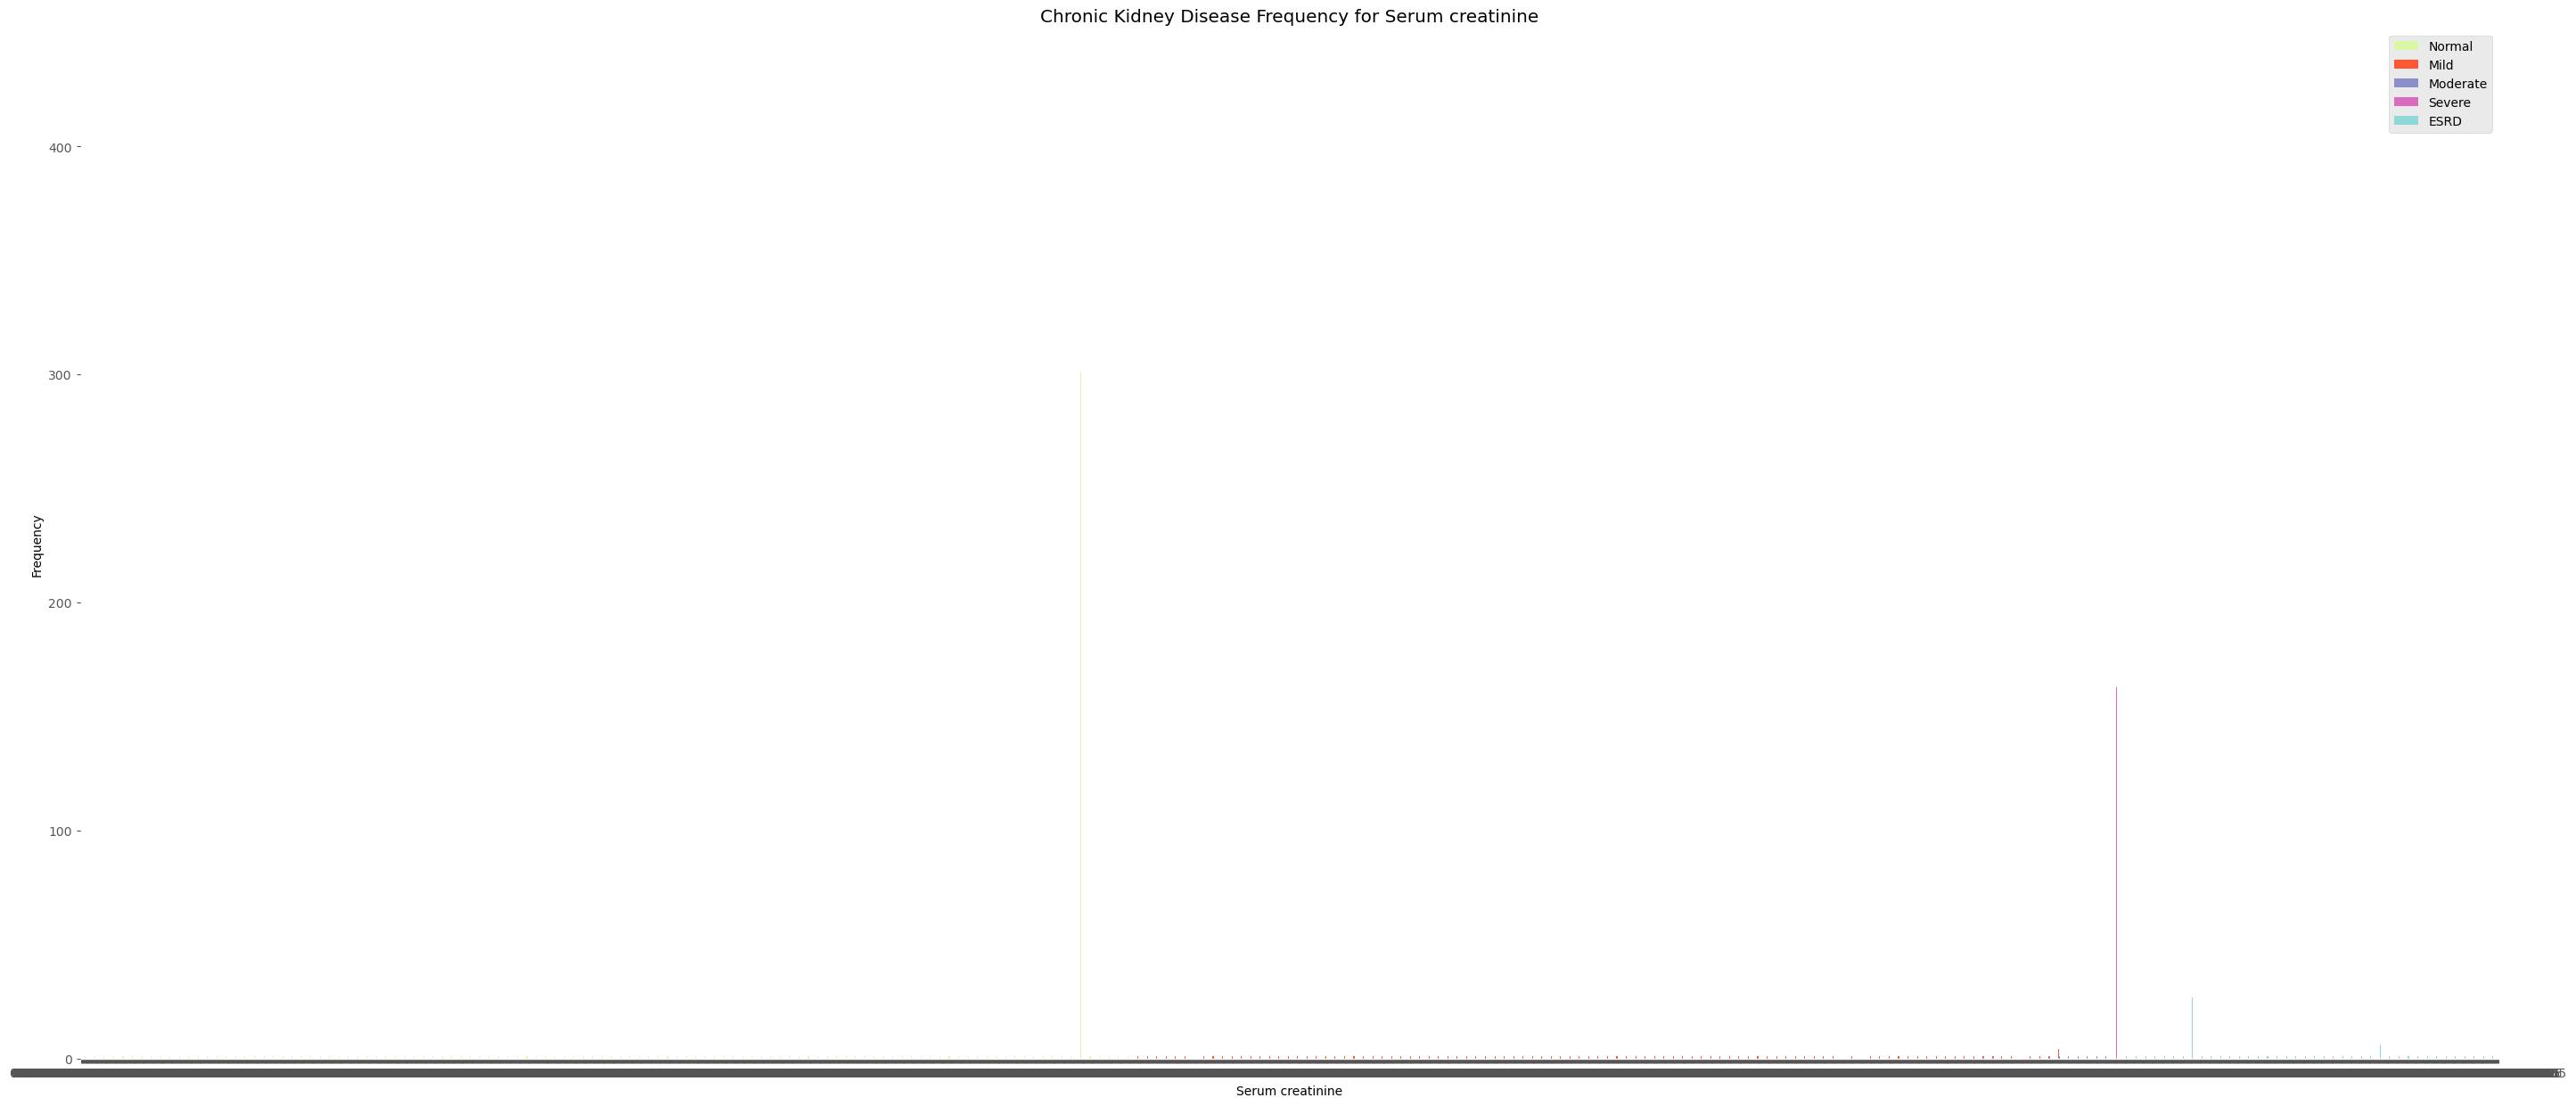

In [61]:
pd.crosstab(df_outliers_removed.serum_creatinine,df_outliers_removed.classification).plot(kind="bar",figsize=(35,15),color=['#DAF7A6','#FF5733','#8c90c8','#d96cbe','#8fd8d8','#2887c8'])
plt.title('Chronic Kidney Disease Frequency for Serum creatinine')
plt.xlabel('Serum creatinine')
plt.xticks(rotation = 0)
plt.legend(['Normal','Mild','Moderate','Severe','ESRD'])
plt.ylabel('Frequency')
plt.show()

### Tidy columns for modelling

## split data to test and train

In [62]:
# implementing SVM
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import svm #Import svm model
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import confusion_matrix,roc_curve,roc_auc_score,accuracy_score,classification_report

In [63]:
df_outliers_removed.dropna(axis=0,inplace=True)

In [64]:
df_outliers_removed.isnull().sum()

age                        0
blood_pressure             0
specific_gravity           0
albumin                    0
sugar                      0
red_blood_cells            0
pus_cell                   0
pus_cell_clumps            0
bacteria                   0
blood_glucose_random       0
blood_urea                 0
serum_creatinine           0
sodium                     0
potassium                  0
hemoglobin                 0
packed_cell_volume         0
white_blood_cell           0
red_blood_cell             0
hypertension               0
diabetes_mellitus          0
coronary_artery_disease    0
appetite                   0
pedal_edema                0
anemia                     0
Gender                     0
GFR                        0
classification             0
dtype: int64

In [65]:
#  check if dataframe contain infinity
df_outliers_removed.isin([np.inf, -np.inf]).sum()

age                        0
blood_pressure             0
specific_gravity           0
albumin                    0
sugar                      0
red_blood_cells            0
pus_cell                   0
pus_cell_clumps            0
bacteria                   0
blood_glucose_random       0
blood_urea                 0
serum_creatinine           0
sodium                     0
potassium                  0
hemoglobin                 0
packed_cell_volume         0
white_blood_cell           0
red_blood_cell             0
hypertension               0
diabetes_mellitus          0
coronary_artery_disease    0
appetite                   0
pedal_edema                0
anemia                     0
Gender                     0
GFR                        0
classification             0
dtype: int64

In [66]:
#  From data we can see that GFR contains  infinity values thus we have to deal with these values
# Replacing infinite with nan
df_outliers_removed.replace([np.inf, -np.inf], 90, inplace=True)
  
# Dropping all the rows with nan values
# df_outliers_removed.dropna(inplace=True)

In [67]:
df_outliers_removed.isin([np.inf, -np.inf]).sum()

age                        0
blood_pressure             0
specific_gravity           0
albumin                    0
sugar                      0
red_blood_cells            0
pus_cell                   0
pus_cell_clumps            0
bacteria                   0
blood_glucose_random       0
blood_urea                 0
serum_creatinine           0
sodium                     0
potassium                  0
hemoglobin                 0
packed_cell_volume         0
white_blood_cell           0
red_blood_cell             0
hypertension               0
diabetes_mellitus          0
coronary_artery_disease    0
appetite                   0
pedal_edema                0
anemia                     0
Gender                     0
GFR                        0
classification             0
dtype: int64

In [68]:
#  Splitting data into training and test 

x = df_outliers_removed.loc [:,df_outliers_removed.columns != 'classification'] 
y = df_outliers_removed.loc [:,df_outliers_removed.columns == 'classification'] 

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [69]:
x_train.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,white_blood_cell,red_blood_cell,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,pedal_edema,anemia,Gender,GFR
7545,54.000000,75.000000,1.016000,1.000000,0.0,0,0,0,0,135.000000,...,11600.0,11.400000,0,0,0,0,0,0,0,25.997723
6268,57.000000,75.000000,1.013000,1.000000,0.0,0,0,0,0,157.000000,...,13200.0,8.600000,0,0,0,0,0,0,0,30.702125
5746,53.000000,72.000000,1.012000,0.000000,0.0,0,0,0,0,87.000000,...,5200.0,5.100000,1,1,0,0,0,0,0,47.608801
9139,27.448680,51.448680,1.012443,1.389191,0.0,0,0,0,0,89.281106,...,8800.0,5.915668,0,0,0,0,0,0,0,141.500986
10546,57.962593,79.962593,1.014019,0.000000,3.0,0,0,0,0,319.149629,...,8800.0,6.894389,0,0,0,0,0,0,1,65.317525


# Feature Selection

In [70]:
# from sklearn.feature_selection import SelectKBest
# from sklearn.feature_selection import f_classif

# fvalue_Best = SelectKBest(f_classif, k=10)
# X_kbest = fvalue_Best.fit_transform(x_train, y_train)
# print(X_kbest)

# print('Original number of features:', x.shape)
# print('Reduced number of features:', X_kbest.shape)



In [71]:
from sklearn.feature_selection import SelectKBest, f_classif
# X_kbest = fvalue_Best.fit_transform(x_train, y_train)
selector = SelectKBest(f_classif, k=10)
Best_features = selector.fit_transform(x_train, y_train)
Best_features_test=selector.fit_transform(x_test, y_test)


In [72]:
Best_features_test.shape

(2611, 10)

In [73]:
cols = selector.get_support(indices=True)
selector.get_feature_names_out()


array(['blood_pressure', 'specific_gravity', 'albumin', 'blood_urea',
       'serum_creatinine', 'sodium', 'packed_cell_volume',
       'red_blood_cell', 'Gender', 'GFR'], dtype=object)

In [74]:
from sklearn.metrics import precision_score,recall_score,f1_score,accuracy_score
x_train = Best_features
x_test = Best_features_test


# Classical ALgorithms

### 
- Logistic Regression
- Support Vector Machines (SVM)
- k-Nearest Neighbor (KNN)
- Decision Tree
- Random Forest
- Naive Bayes (GaussianNB)


In [75]:
# Saving best model
BestModelList=[]


In [114]:
from mlxtend.plotting import plot_confusion_matrix

###  Logistic Regression

In [139]:
lr_grid = LogisticRegression(multi_class='multinomial', solver='lbfgs')

In [140]:
# pipeline = Pipeline([
#     ('standardscaler', StandardScaler()),
#     ('clf', LR_model())
# ])

# parameters = {
    
#     'clf__random_state': [34]
# }

# lr_grid = GridSearchCV(pipeline, param_grid=parameters,cv=10)

lr_grid.fit(x_train, y_train)


LogisticRegression(multi_class='multinomial')

In [141]:
y_pred = lr_grid.predict(x_test)
lr_precision = precision_score(y_test, y_pred,average='weighted') 
lr_recall = recall_score(y_test, y_pred,average='weighted')
lr_accuracy = accuracy_score(y_test, y_pred)
lr_f1 = f1_score(y_test, y_pred,average='weighted')

print("\nLogistic Regression Model Evaluation\n")
print("Precision : {:.2f}".format(lr_precision*100))
print("Recall : {:.2f}".format(lr_recall*100))
print("Accuracy : {:.2f}".format(lr_accuracy*100))
print("F1_score : {:.2f}".format(lr_f1*100))


Logistic Regression Model Evaluation

Precision : 93.59
Recall : 93.53
Accuracy : 93.53
F1_score : 93.55


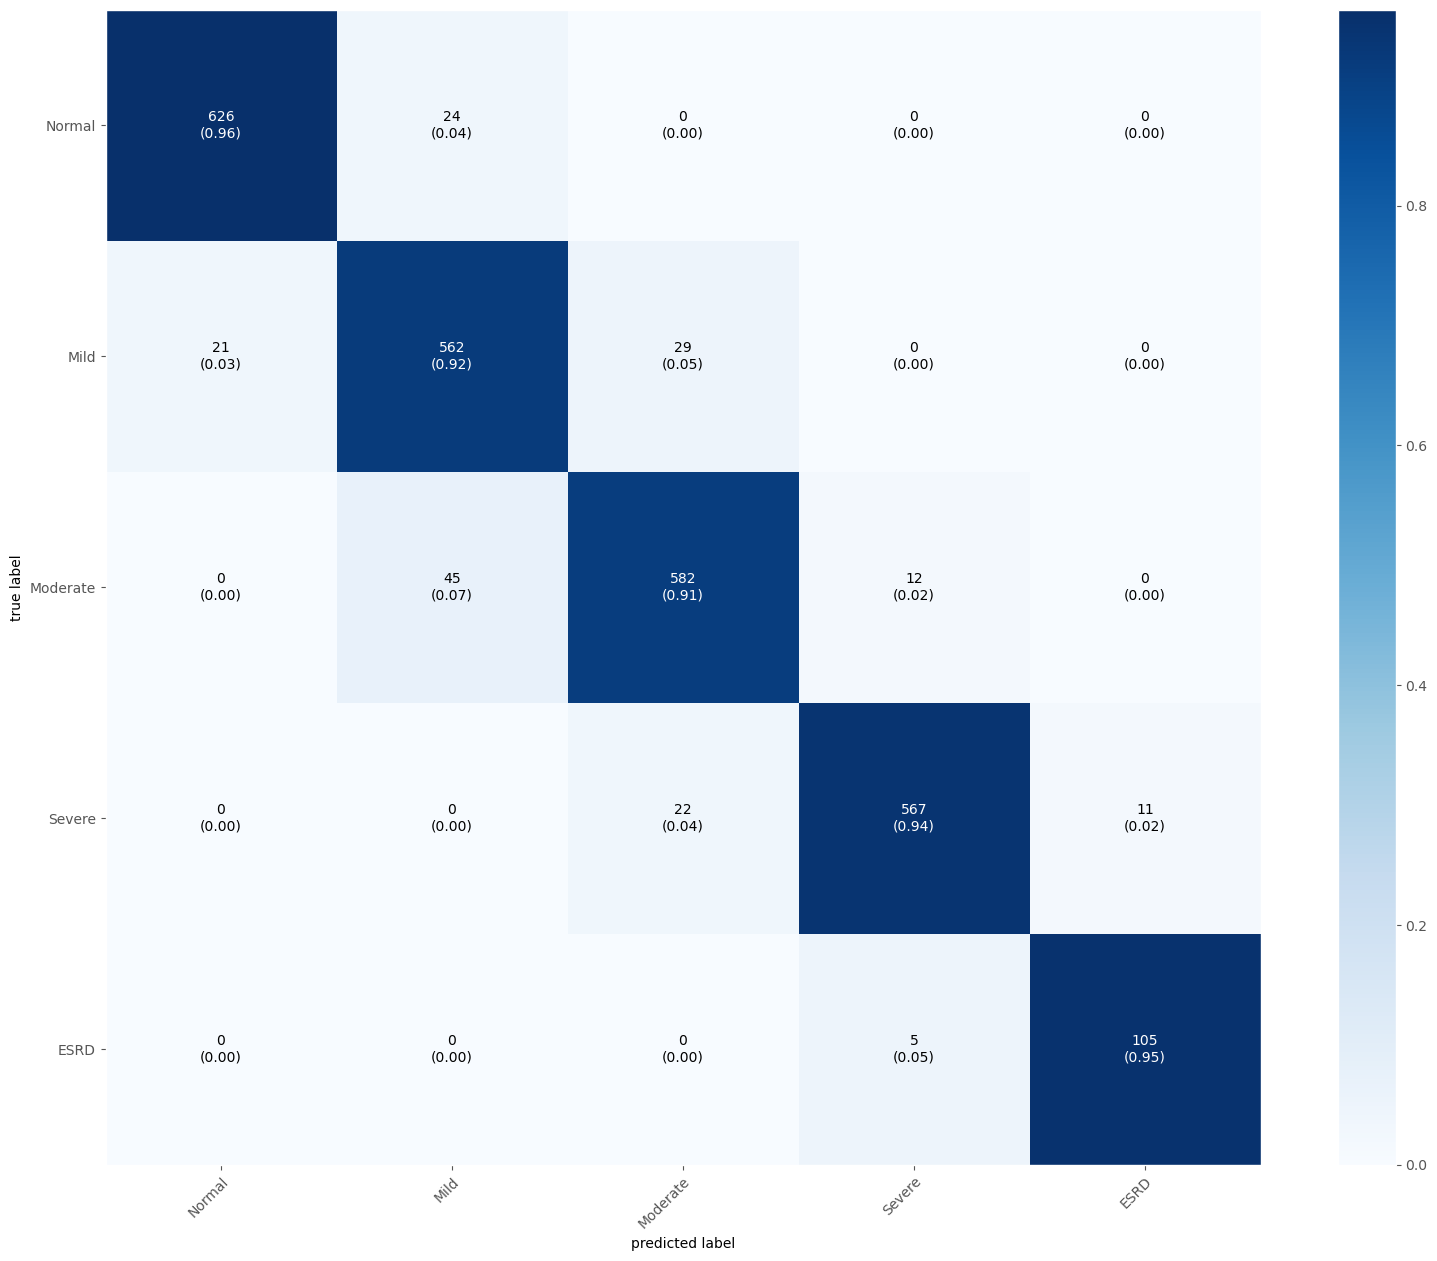

In [142]:
cf_matrix = confusion_matrix(y_test, y_pred)
class_names=['Normal','Mild','Moderate','Severe','ESRD']
fig, ax = plot_confusion_matrix(conf_mat=cf_matrix,
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True,
                               class_names=class_names)
plt.show()

In [143]:
acc_lr=lr_accuracy

In [144]:
# acc_lr = lr_grid.best_score_*100
print("Accuracy of the model is {:.2f}".format(acc_lr*100))

Accuracy of the model is 93.53


In [148]:
# from sklearn.metrics import confusion_matrix
# import seaborn as sns

# #Get the confusion matrix
# cf_matrix = confusion_matrix(y_test, y_pred)
# ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True,
#             fmt='.2%', cmap='Blues')
# ax.set_title('Seaborn Confusion Matrix with labels\n\n');
# ax.set_xlabel('\nPredicted Kidney Disease Category')
# ax.set_ylabel('Actual Kidney Disease Category ');
# ## Ticket labels - List must be in alphabetical order
# ax.xaxis.set_ticklabels(['Normal','Mild','Moderate','Severe','ESRD'])
# ax.yaxis.set_ticklabels(['Normal','Mild','Moderate','Severe','ESRD'])
# ## Display the visualization of the Confusion Matrix.
# plt.show()

In [149]:
BestModelList.append(acc_lr)

### Support Vector Machine (SVM)

Important parameters having higher impact on model performance, “kernel”, “gamma” and “C”.

In [150]:
pipeline = Pipeline([
    ('standardscaler', StandardScaler()),
    ('clf', SVC())
])

parameters = {
    'clf__C': [0.1, 0.5, 1.0],
    'clf__random_state': [34]
}



svm_grid = GridSearchCV(pipeline, param_grid=parameters,cv=10)

svm_grid.fit(x_train, y_train)


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('clf', SVC())]),
             param_grid={'clf__C': [0.1, 0.5, 1.0], 'clf__random_state': [34]})

In [151]:
y_pred = svm_grid.predict(x_test)
svm_precision = precision_score(y_test, y_pred,average='weighted') 
svm_recall = recall_score(y_test, y_pred,average='weighted')
svm_accuracy = accuracy_score(y_test, y_pred)
SVC_f1 = f1_score(y_test, y_pred,average='weighted')

print("\nSupport Vector Machine Model Evaluation\n")
print("Precision : {:.2f}".format(svm_precision*100))
print("Recall : {:.2f}".format(svm_recall*100))
print("Accuracy : {:.2f}".format(svm_accuracy*100))
print("F1_score : {:.2f}".format(SVC_f1*100))


Support Vector Machine Model Evaluation

Precision : 97.88
Recall : 97.86
Accuracy : 97.86
F1_score : 97.85


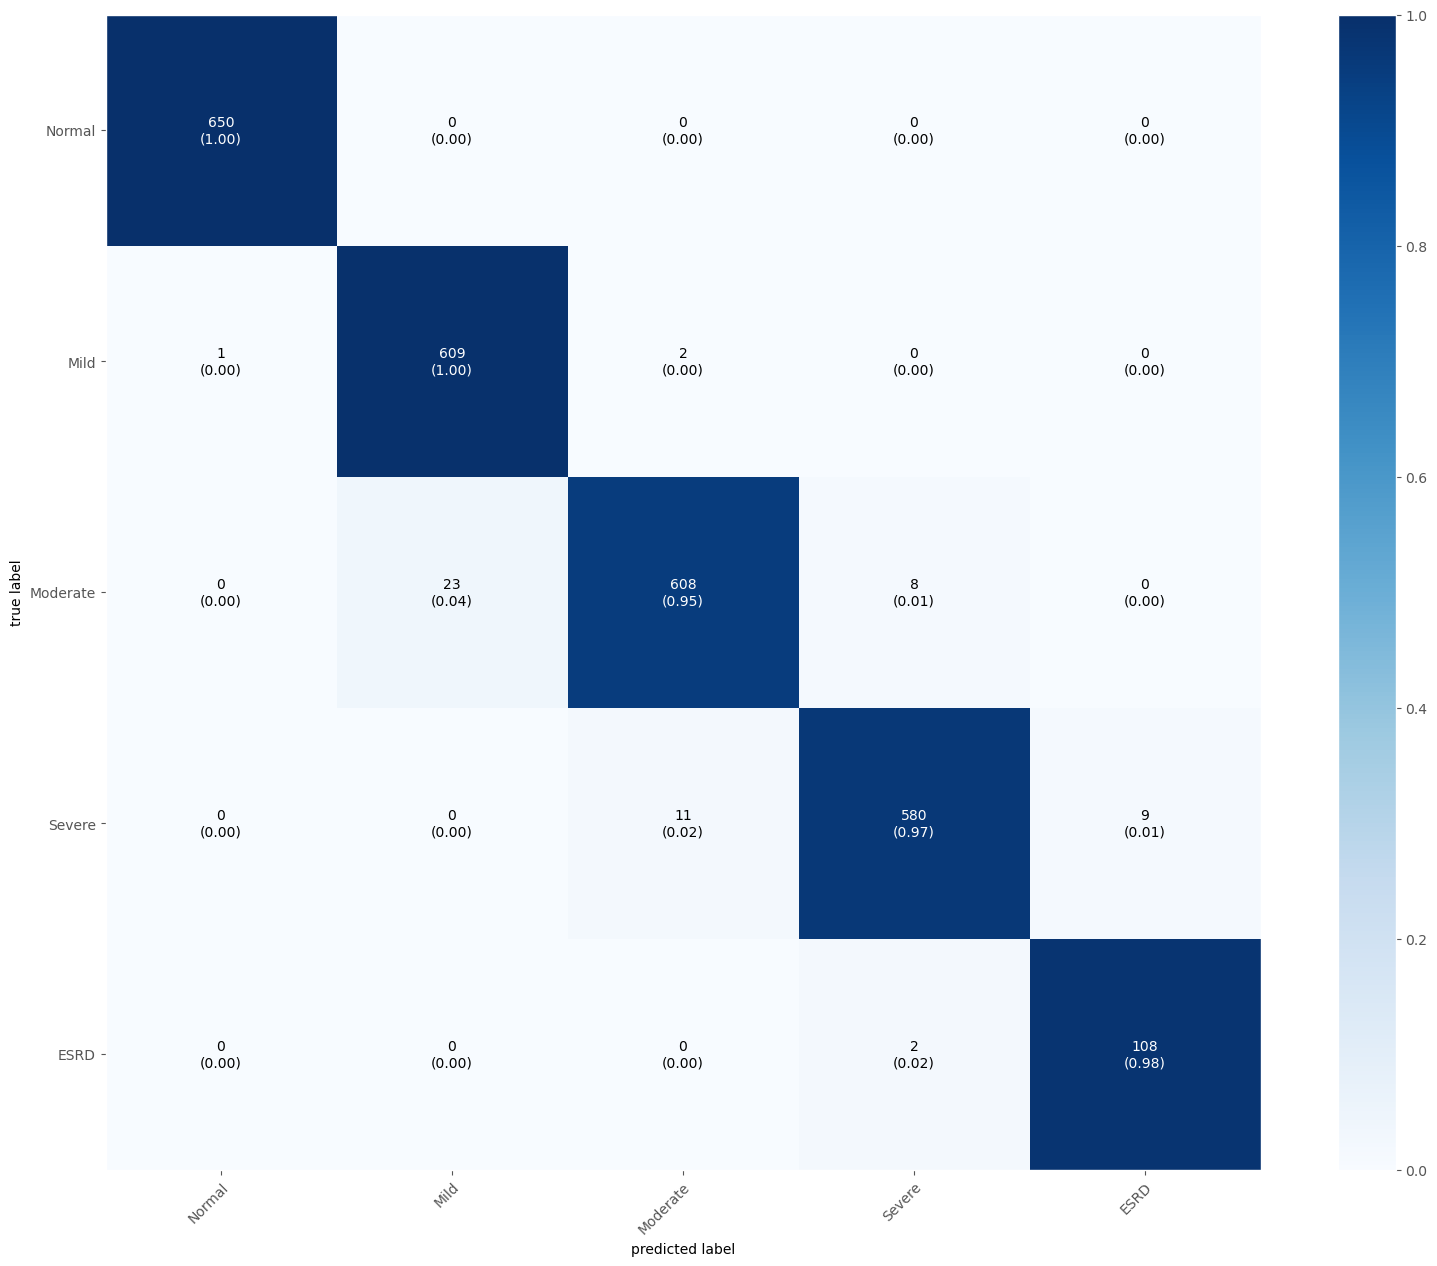

In [152]:
cf_matrix = confusion_matrix(y_test, y_pred)
class_names=['Normal','Mild','Moderate','Severe','ESRD']
fig, ax = plot_confusion_matrix(conf_mat=cf_matrix,
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True,
                               class_names=class_names)

In [153]:

acc_svc = svm_grid.best_score_*100
print("Accuracy of the model is {:.2f}".format(acc_svc))

Accuracy of the model is 98.02


In [86]:
# plot_confusion_matrix(svm_grid,x_train, y_train )

In [87]:
# Saving best model

BestModelList.append(acc_svc)

In [154]:
# from sklearn.metrics import confusion_matrix
# import seaborn as sns

# #Get the confusion matrix
# cf_matrix = confusion_matrix(y_test, y_pred)
# ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True,
#             fmt='.2%', cmap='Blues')
# ax.set_title('Seaborn Confusion Matrix with labels\n\n');
# ax.set_xlabel('\nPredicted Kidney Disease Category')
# ax.set_ylabel('Actual Kidney Disease Category ');
# ## Ticket labels - List must be in alphabetical order
# ax.xaxis.set_ticklabels(['Normal','Mild','Moderate','Severe','ESRD'])
# ax.yaxis.set_ticklabels(['Normal','Mild','Moderate','Severe','ESRD'])
# ## Display the visualization of the Confusion Matrix.
# plt.show()

### Decision Tree

In [195]:
clf = DecisionTreeClassifier(random_state=13)

# Create grid parameters for hyperparameter tuning

param_grid = {'max_features': ['auto', 'sqrt', 'log2'],
              'ccp_alpha': [0.1, .01, .001],
              'max_depth' : [5, 6, 7, 8, 9],
              'criterion' :['gini', 'entropy']
             }

# Create gridsearch instance

grid_dt = GridSearchCV(estimator=clf,
                    param_grid=param_grid,scoring = 'accuracy')

# Fit the model
grid_dt.fit(x_train, y_train)



GridSearchCV(estimator=DecisionTreeClassifier(random_state=13),
             param_grid={'ccp_alpha': [0.1, 0.01, 0.001],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 6, 7, 8, 9],
                         'max_features': ['auto', 'sqrt', 'log2']},
             scoring='accuracy')

In [196]:
# Assess the score train 
grid_dt.best_score_, grid_dt.best_params_

(0.9975098536578209,
 {'ccp_alpha': 0.001,
  'criterion': 'entropy',
  'max_depth': 9,
  'max_features': 'auto'})

In [197]:
acc_dt = grid_dt.best_score_ * 100
print("Accuracy of the model is {:.2f}".format(acc_dt))

Accuracy of the model is 99.75


In [198]:
y_pred = grid_dt.predict(x_test)
dt_precision = precision_score(y_test, y_pred,average='weighted') 
dt_recall = recall_score(y_test, y_pred,average='weighted')
dt_accuracy = accuracy_score(y_test, y_pred)
dt_f1 = f1_score(y_test, y_pred,average='weighted')

print("\nDecision Tree Model Evaluation\n")
print("Precision : {:.2f}".format(dt_precision*100))
print("Recall : {:.2f}".format(dt_recall*100))
print("Accuracy : {:.2f}".format(dt_accuracy*100))
print("F1 score : {:.2f}".format(dt_f1*100))


Decision Tree Model Evaluation

Precision : 99.58
Recall : 99.58
Accuracy : 99.58
F1 score : 99.58


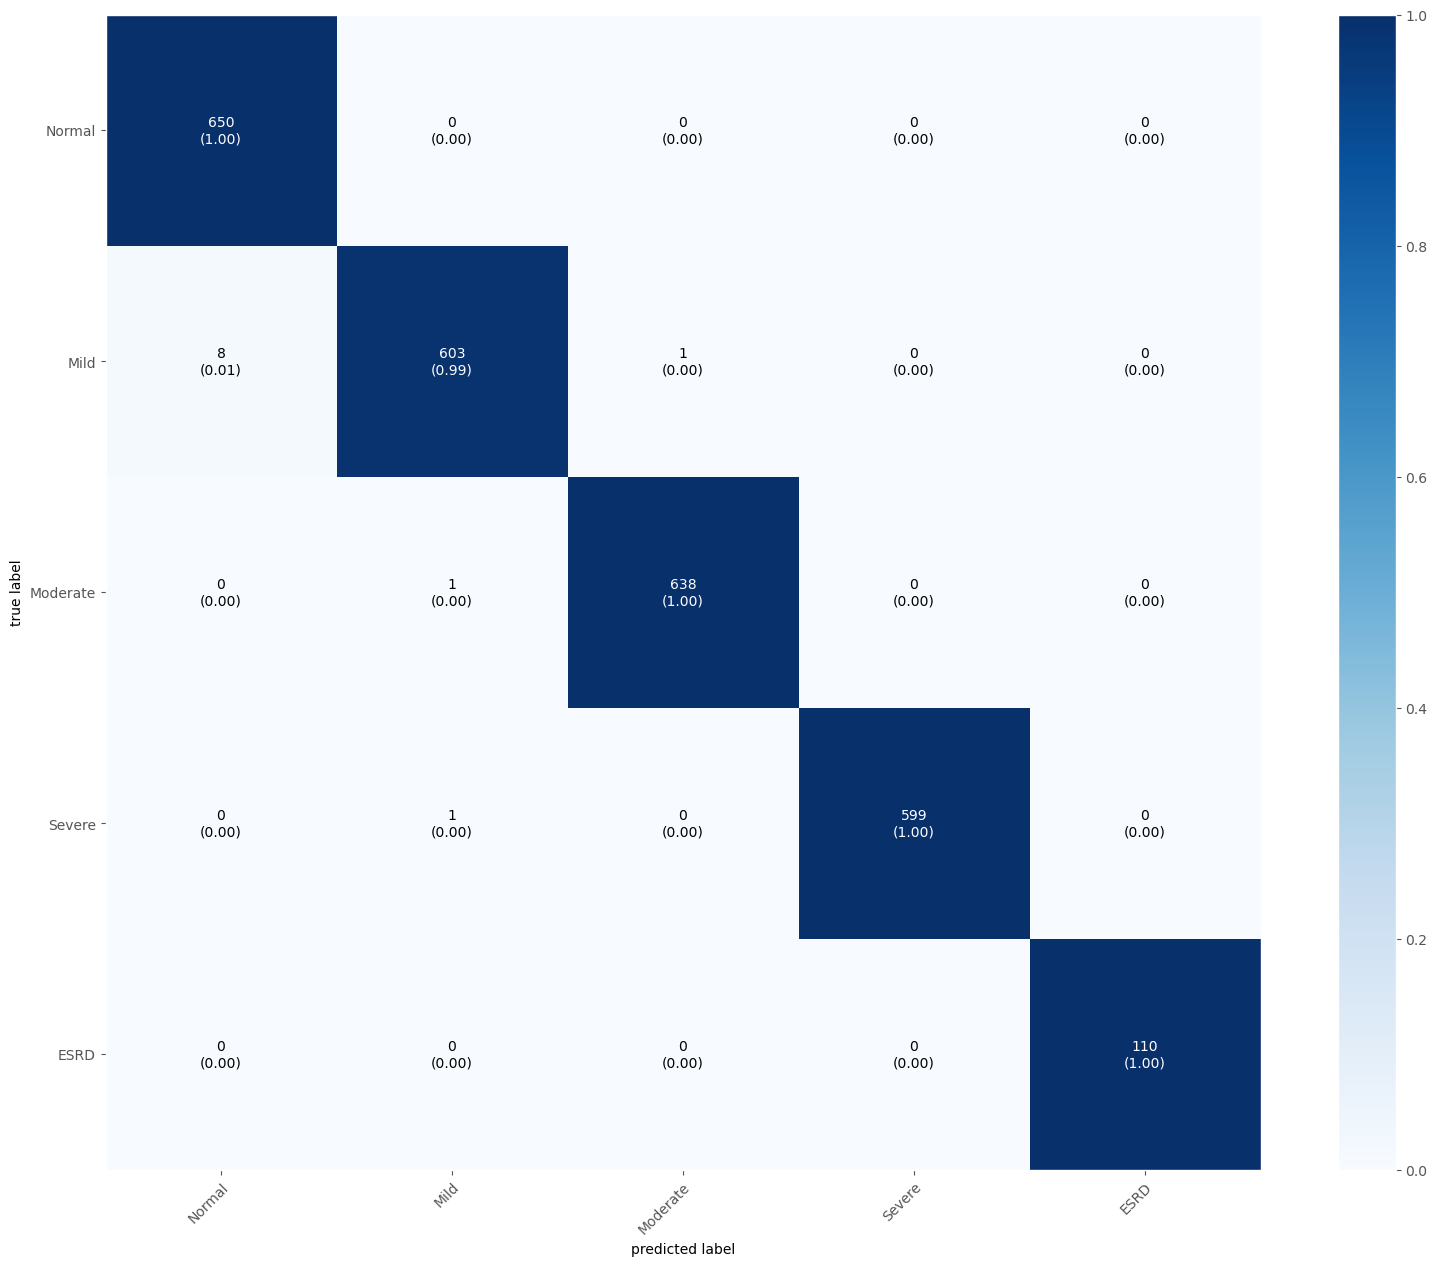

In [199]:
cf_matrix = confusion_matrix(y_test, y_pred)
class_names=['Normal','Mild','Moderate','Severe','ESRD']
fig, ax = plot_confusion_matrix(conf_mat=cf_matrix,
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True,
                               class_names=class_names)
plt.show()

In [93]:
# test
# plot_confusion_matrix(grid_dt,x_train, y_train,values_format='d' )

In [160]:
# Saving best model
BestModelList.append(acc_dt)

In [161]:
# from sklearn.metrics import confusion_matrix
# import seaborn as sns

# #Get the confusion matrix
# cf_matrix = confusion_matrix(y_test, y_pred)
# ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True,
#             fmt='.2%', cmap='Blues')
# ax.set_title('Seaborn Confusion Matrix with labels\n\n');
# ax.set_xlabel('\nPredicted Kidney Disease Category')
# ax.set_ylabel('Actual Kidney Disease Category ');
# ## Ticket labels - List must be in alphabetical order
# ax.xaxis.set_ticklabels(['Normal','Mild','Moderate','Severe','ESRD'])
# ax.yaxis.set_ticklabels(['Normal','Mild','Moderate','Severe','ESRD'])
# ## Display the visualization of the Confusion Matrix.
# plt.show()

## Random forest

In [200]:
clf = RandomForestClassifier(random_state=69)

# Create grid parameters for hyperparameter tuning

param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

# Create gridsearch instance

rf_grid = GridSearchCV(estimator=clf,
                    param_grid=param_grid)

# Fit the model

rf_grid.fit(x_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(random_state=69),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500]})

In [201]:
y_pred = rf_grid.predict(x_test)
rf_precision = precision_score(y_test, y_pred,average='weighted') 
rf_recall = recall_score(y_test, y_pred,average='weighted')
rf_accuracy = accuracy_score(y_test, y_pred)
rf_f1 = f1_score(y_test, y_pred,average='weighted')

print("\nRandom Forest Model Evaluation\n")
print("Precision : {:.2f}".format(rf_precision*100))
print("Recall : {:.2f}".format(rf_recall*100))
print("Accuracy : {:.2f}".format(rf_accuracy*100))
print("F1 score : {:.2f}".format(rf_f1*100))


Random Forest Model Evaluation

Precision : 100.00
Recall : 100.00
Accuracy : 100.00
F1 score : 100.00


In [202]:
# Assess the score
rf_grid.best_score_, rf_grid.best_params_

(1.0,
 {'criterion': 'gini',
  'max_depth': 5,
  'max_features': 'auto',
  'n_estimators': 200})

In [203]:
acc_rf=rf_grid.best_score_*100
print("Accuracy of the model is {:.2f}".format(acc_rf))

Accuracy of the model is 100.00


In [204]:
# c=grid.predict(x_tes

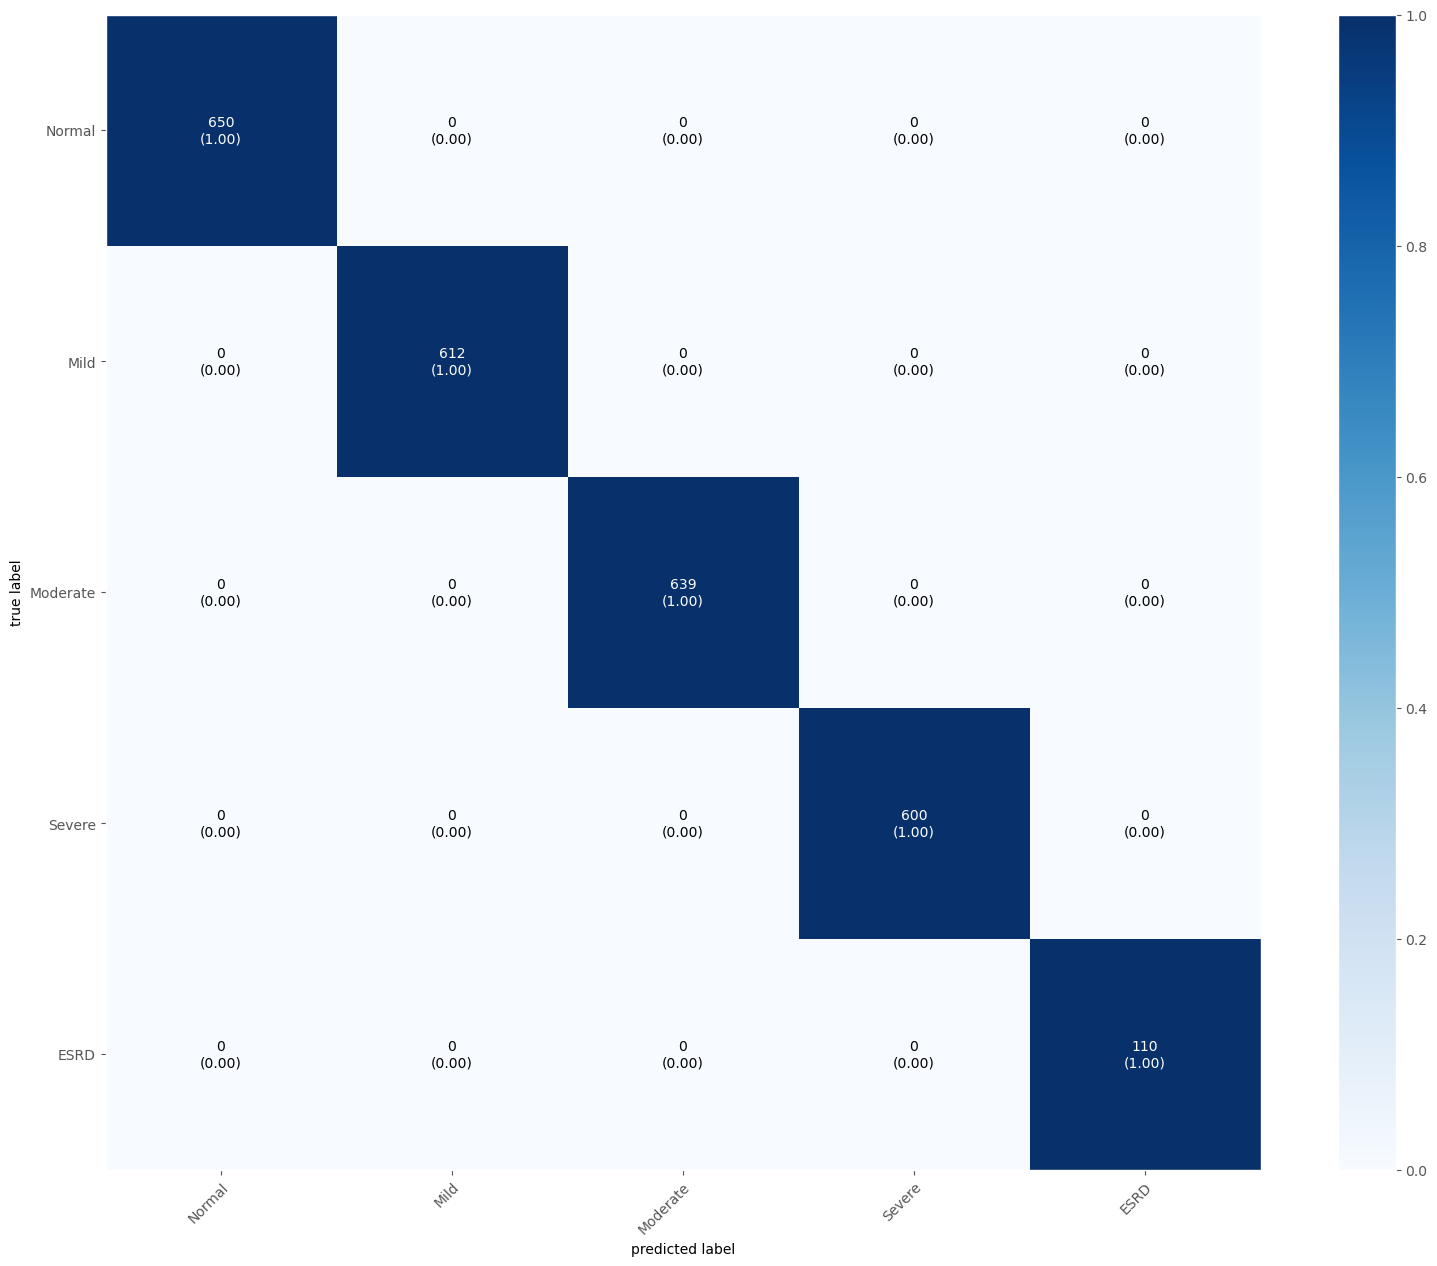

In [205]:
cf_matrix = confusion_matrix(y_test, y_pred)
class_names=['Normal','Mild','Moderate','Severe','ESRD']
fig, ax = plot_confusion_matrix(conf_mat=cf_matrix,
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True,
                               class_names=class_names)
plt.show()

In [108]:
# plot_confusion_matrix(rf_grid,x_train, y_train,values_format='d' )

In [168]:
# from sklearn.metrics import confusion_matrix
# import seaborn as sns

# #Get the confusion matrix
# cf_matrix = confusion_matrix(y_test, y_pred)
# ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True,
#             fmt='.2%', cmap='Blues')
# ax.set_title('Seaborn Confusion Matrix with labels\n\n');
# ax.set_xlabel('\nPredicted Kidney Disease Category')
# ax.set_ylabel('Actual Kidney Disease Category ');
# ## Ticket labels - List must be in alphabetical order
# ax.xaxis.set_ticklabels(['Normal','Mild','Moderate','Severe','ESRD'])
# ax.yaxis.set_ticklabels(['Normal','Mild','Moderate','Severe','ESRD'])
# ## Display the visualization of the Confusion Matrix.
# plt.show()

In [169]:
# Saving best model
BestModelList.append(acc_rf)

### Gaussian Naive Bayes

In [206]:
pipeline = Pipeline([
    ('clf', GaussianNB())
])

parameters = {
    'clf__priors': [None],
    'clf__var_smoothing': [0.001, 0.0001, 0.0001]
}

nb_grid = GridSearchCV(pipeline, param_grid=parameters)

nb_grid.fit(x_train, y_train)
# y_pred_gnb = cv.predict(x_test)

GridSearchCV(estimator=Pipeline(steps=[('clf', GaussianNB())]),
             param_grid={'clf__priors': [None],
                         'clf__var_smoothing': [0.001, 0.0001, 0.0001]})

In [207]:
y_pred = nb_grid.predict(x_test)
nb_precision = precision_score(y_test, y_pred,average='weighted') 
nb_recall = recall_score(y_test, y_pred,average='weighted')
nb_accuracy = accuracy_score(y_test, y_pred)
nb_f1 = f1_score(y_test, y_pred,average='weighted')

print("\nGaussian Naive Bayes Model Evaluation Summary\n")
print("Precision : {:.2f}".format(nb_precision*100))
print("Recall : {:.2f}".format(nb_recall*100))
print("Accuracy : {:.2f}".format(nb_accuracy*100))
print("F1 Score : {:.2f}".format(nb_f1*100))


Gaussian Naive Bayes Model Evaluation Summary

Precision : 93.64
Recall : 93.53
Accuracy : 93.53
F1 Score : 93.49


In [208]:
acc_nb = nb_grid.best_score_*100
print("Accuracy of the model is {:.2f}".format(acc_nb))

Accuracy of the model is 93.70


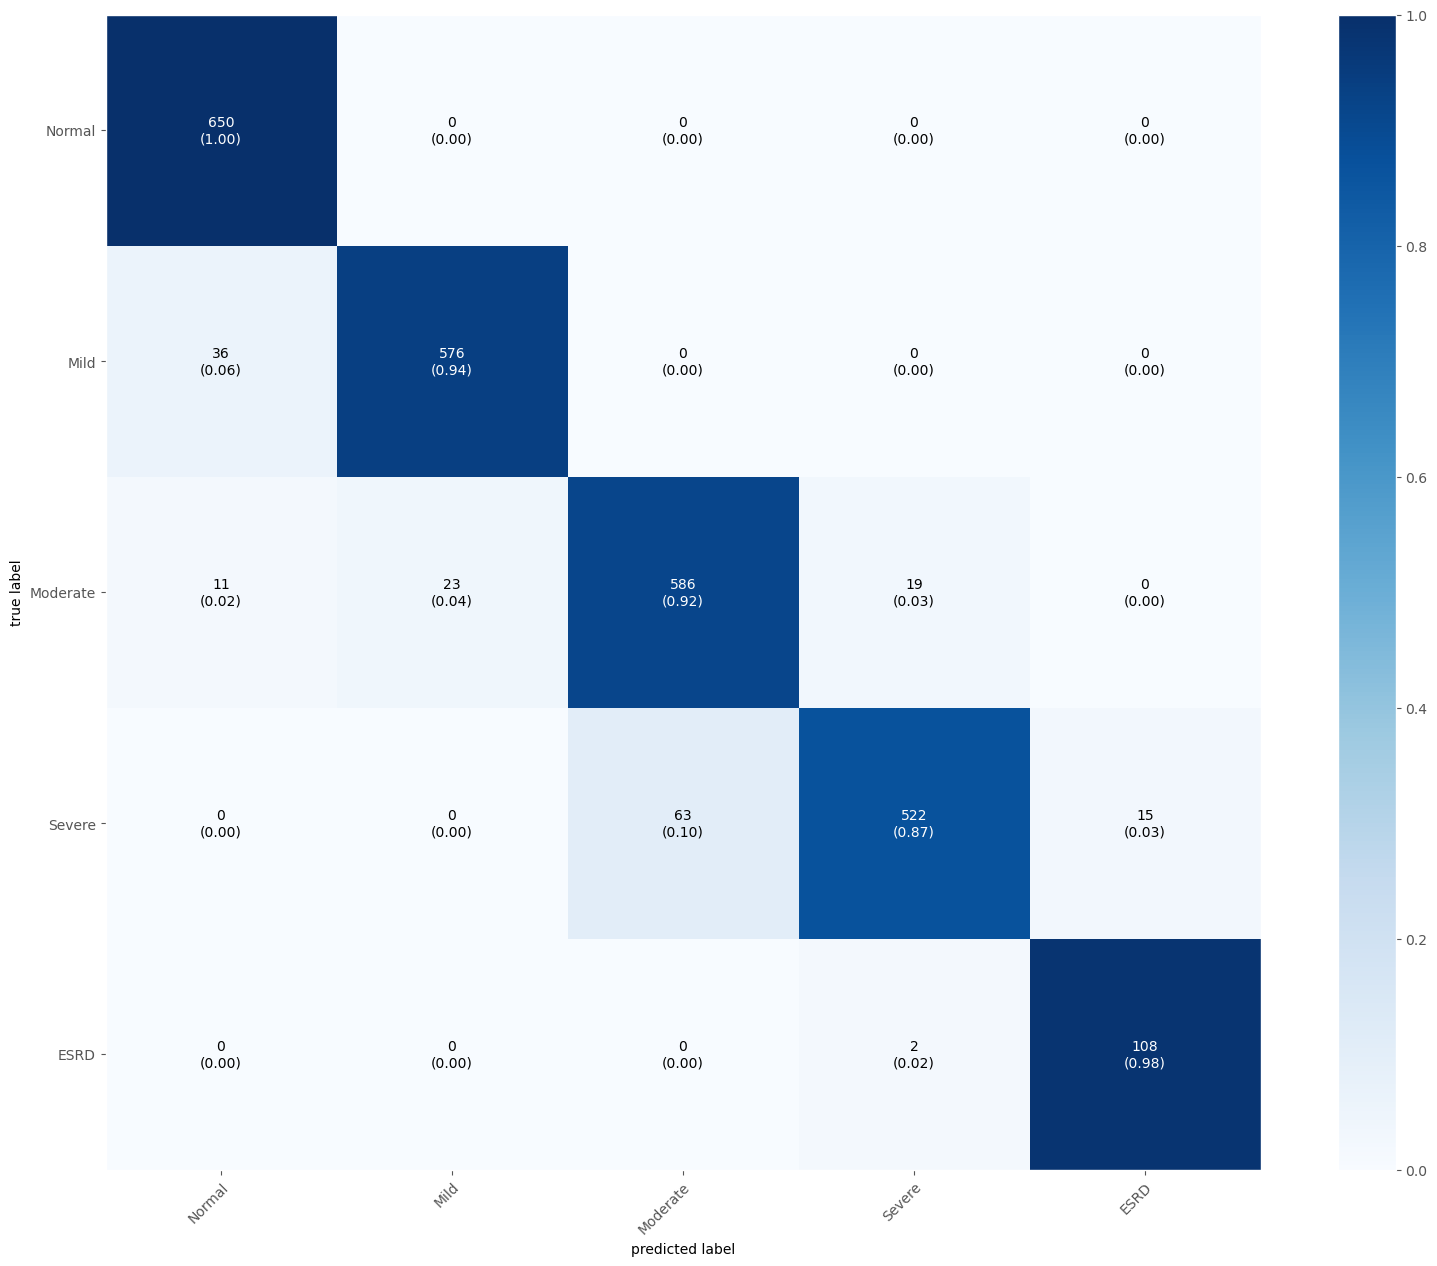

In [209]:
cf_matrix = confusion_matrix(y_test, y_pred)
class_names=['Normal','Mild','Moderate','Severe','ESRD']
fig, ax = plot_confusion_matrix(conf_mat=cf_matrix,
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True,
                               class_names=class_names)
plt.show()

In [210]:
# plot_confusion_matrix(nb_grid,x_train, y_train,values_format='d' )

In [211]:
# Saving best model
BestModelList.append(acc_nb)

In [212]:
# from sklearn.metrics import confusion_matrix
# import seaborn as sns

# #Get the confusion matrix
# cf_matrix = confusion_matrix(y_test, y_pred)
# ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True,
#             fmt='.2%', cmap='Blues')
# ax.set_title('Seaborn Confusion Matrix with labels\n\n');
# ax.set_xlabel('\nPredicted Kidney Disease Category')
# ax.set_ylabel('Actual Kidney Disease Category ');
# ## Ticket labels - List must be in alphabetical order
# ax.xaxis.set_ticklabels(['Normal','Mild','Moderate','Severe','ESRD'])
# ax.yaxis.set_ticklabels(['Normal','Mild','Moderate','Severe','ESRD'])
# ## Display the visualization of the Confusion Matrix.
# plt.show()

## KNN

In [213]:
pipeline = Pipeline([
    ('clf', KNeighborsClassifier(n_neighbors=26))
])

parameters = {
}

knn_grid = GridSearchCV(pipeline, param_grid=parameters,cv=10)

knn_grid.fit(x_train, y_train)


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('clf',
                                        KNeighborsClassifier(n_neighbors=26))]),
             param_grid={})

In [214]:
y_pred = knn_grid.predict(x_test)
knn_precision = precision_score(y_test, y_pred,average='weighted') 
knn_recall = recall_score(y_test, y_pred,average='weighted')
knn_accuracy = accuracy_score(y_test, y_pred)
knn_f1 = f1_score(y_test, y_pred,average='weighted')

print("\nKNN Model Evaluation Summary\n")
print("Precision : {:.2f}".format(knn_precision*100))
print("Recall : {:.2f}".format(knn_recall*100))
print("F1_measure : {:.2f}".format(knn_f1*100))


KNN Model Evaluation Summary

Precision : 96.92
Recall : 96.82
F1_measure : 96.83


In [215]:
acc_knn = knn_grid.best_score_*100
print("Accuracy of the model is {:.2f}".format(acc_knn))

Accuracy of the model is 96.91


In [216]:
# plot_confusion_matrix(knn_grid,x_train, y_train,values_format='d' )

In [217]:
# Saving best model
BestModelList.append(acc_knn)

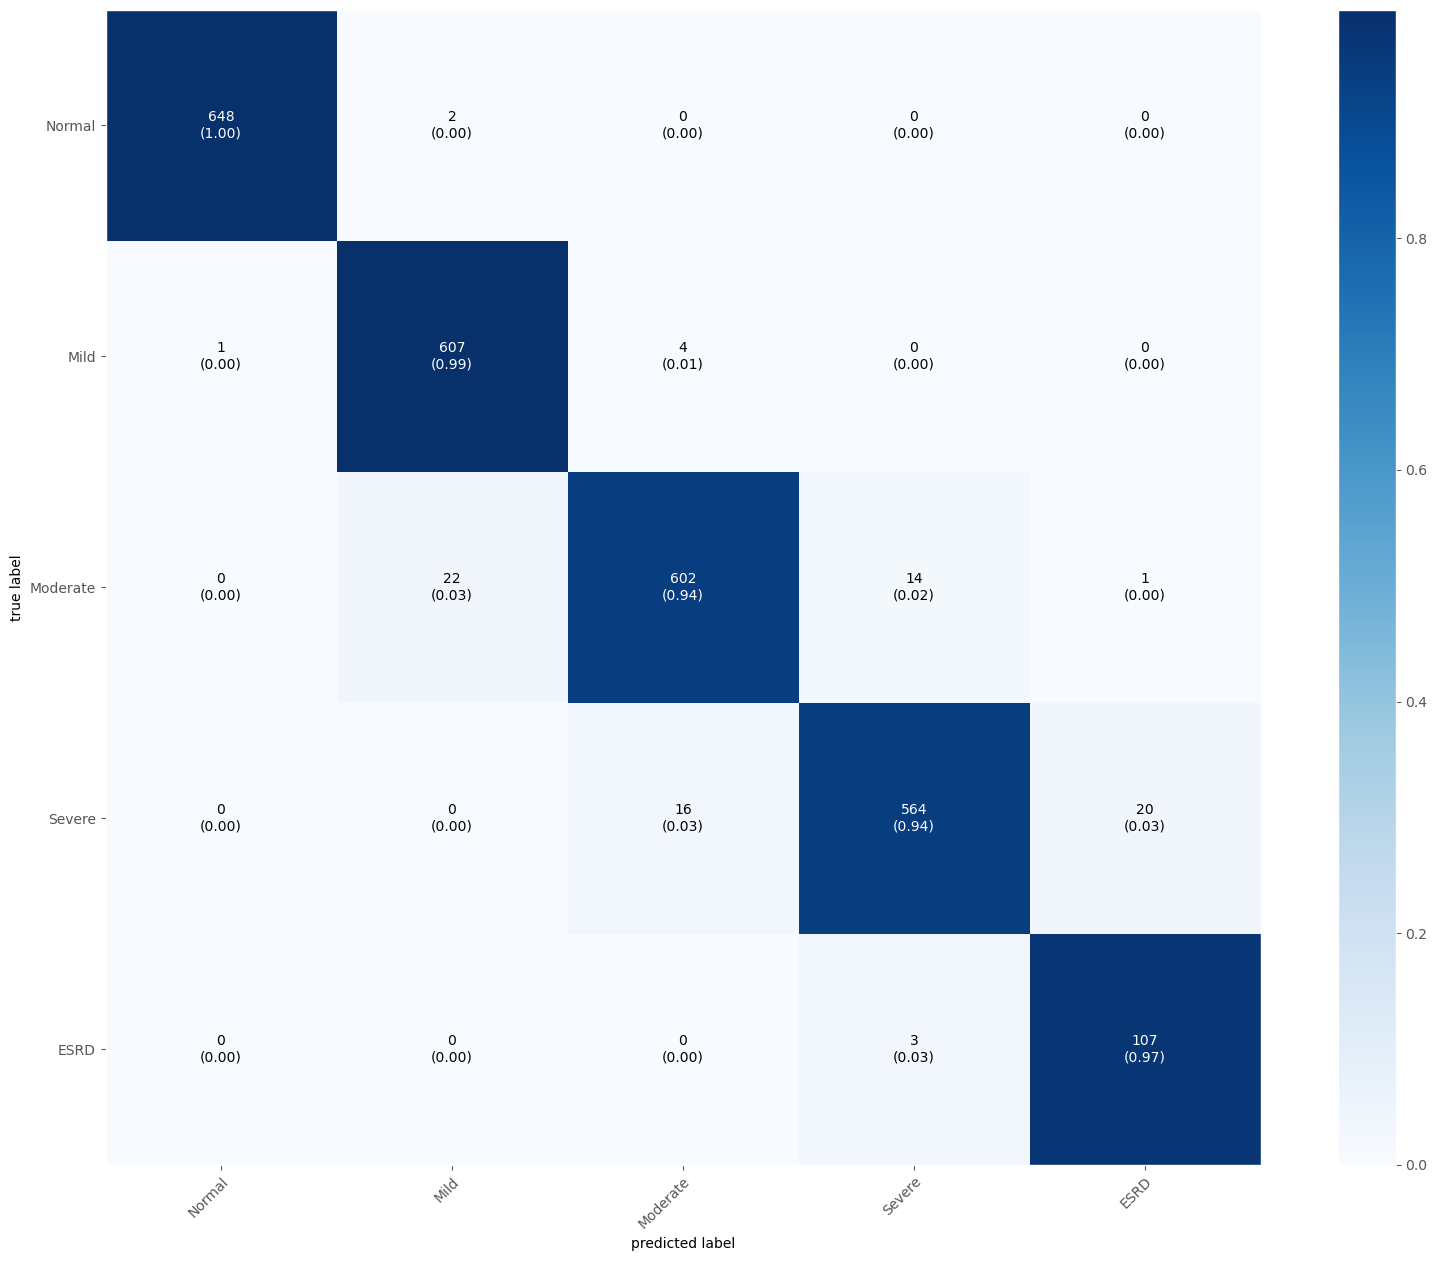

In [218]:
cf_matrix = confusion_matrix(y_test, y_pred)
class_names=['Normal','Mild','Moderate','Severe','ESRD']
fig, ax = plot_confusion_matrix(conf_mat=cf_matrix,
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True,
                               class_names=class_names)
plt.show()

In [219]:
# from sklearn.metrics import confusion_matrix
# import seaborn as sns

# #Get the confusion matrix
# cf_matrix = confusion_matrix(y_test, y_pred)
# ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True,
#             fmt='.2%', cmap='Blues')
# ax.set_title('Seaborn Confusion Matrix with labels\n\n');
# ax.set_xlabel('\nPredicted Kidney Disease Category')
# ax.set_ylabel('Actual Kidney Disease Category ');
# ## Ticket labels - List must be in alphabetical order
# ax.xaxis.set_ticklabels(['Normal','Mild','Moderate','Severe','ESRD'])
# ax.yaxis.set_ticklabels(['Normal','Mild','Moderate','Severe','ESRD'])
# ## Display the visualization of the Confusion Matrix.
# plt.show()

In [220]:
from sklearn.metrics import multilabel_confusion_matrix
y_unique = y_test.classification.unique()
mcm = multilabel_confusion_matrix(y_test, y_pred, labels = y_unique)
mcm

array([[[1960,    1],
        [   2,  648]],

       [[1975,   24],
        [   5,  607]],

       [[1994,   17],
        [  36,  564]],

       [[1952,   20],
        [  37,  602]],

       [[2480,   21],
        [   3,  107]]], dtype=int64)

In [221]:
y_test

,classification
3256,1
8957,1
10043,1
1262,2
8370,1
...,...
3216,1
342,4
8899,1
4225,3


# Modern Algorithm

## CatBoost (categorical Boosting ) algorithm

In [222]:
from catboost import CatBoostClassifier, Pool

cat_model = CatBoostClassifier(
    iterations = 100, 
    loss_function='MultiClass',
    bootstrap_type = "Bayesian",
    eval_metric = 'MultiClass',
    leaf_estimation_iterations = 100,
    random_strength = 0.5,
    depth = 7,
    l2_leaf_reg = 5,
    learning_rate=0.1,
    bagging_temperature = 0.5
    # task_type = "GPU",
)

# training the model
cat_model.fit(x_train, y_train)

# predicting the model output
y_pred_cat = cat_model.predict(x_test)
# printing the accuracy of the tuned model


cb_precision = precision_score(y_test, y_pred,average='weighted') 
cb_recall = recall_score(y_test, y_pred,average='weighted')

cb_f1 = f1_score(y_test, y_pred,average='weighted')
cb_accuracy=accuracy_score(y_test,y_pred_cat)
print("\nCatBoostClassifier Model Evaluation Summary\n")

print("accuracy of the catboost: ",cb_accuracy *100)
print("Precision : {:.2f}".format(cb_precision*100))
print("Recall : {:.2f}".format(cb_recall*100))
print("F1 Score : {:.2f}".format(cb_f1*100))



# confusion metrics of the LightGBM and plotting the same
confusion_matrix_catboost = confusion_matrix(y_test,y_pred_cat)
print(confusion_matrix_catboost) 

0:	learn: 0.9489129	total: 381ms	remaining: 37.7s
1:	learn: 0.5195497	total: 751ms	remaining: 36.8s
2:	learn: 0.2858207	total: 1.14s	remaining: 37s
3:	learn: 0.1520899	total: 1.51s	remaining: 36.3s
4:	learn: 0.0854135	total: 1.92s	remaining: 36.5s
5:	learn: 0.0532848	total: 2.41s	remaining: 37.7s
6:	learn: 0.0373463	total: 2.89s	remaining: 38.4s
7:	learn: 0.0266341	total: 3.3s	remaining: 38s
8:	learn: 0.0184138	total: 3.67s	remaining: 37.1s
9:	learn: 0.0141509	total: 4.06s	remaining: 36.6s
10:	learn: 0.0117053	total: 4.43s	remaining: 35.8s
11:	learn: 0.0102578	total: 4.8s	remaining: 35.2s
12:	learn: 0.0089179	total: 5.17s	remaining: 34.6s
13:	learn: 0.0072638	total: 5.54s	remaining: 34s
14:	learn: 0.0067695	total: 5.93s	remaining: 33.6s
15:	learn: 0.0063059	total: 6.3s	remaining: 33.1s
16:	learn: 0.0055151	total: 6.71s	remaining: 32.8s
17:	learn: 0.0050321	total: 7.16s	remaining: 32.6s
18:	learn: 0.0043098	total: 7.59s	remaining: 32.3s
19:	learn: 0.0040716	total: 8.18s	remaining: 32.7s

In [223]:
# from sklearn.metrics import confusion_matrix
# import seaborn as sns

# #Get the confusion matrix
# cf_matrix = confusion_matrix(y_test, y_pred_cat)
# ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True,
#             fmt='.2%', cmap='Blues')
# ax.set_title('Seaborn Confusion Matrix with labels\n\n');
# ax.set_xlabel('\nPredicted Kidney Disease Category')
# ax.set_ylabel('Actual Kidney Disease Category ');
# ## Ticket labels - List must be in alphabetical order
# ax.xaxis.set_ticklabels(['Normal','Mild','Moderate','Severe','ESRD'])
# ax.yaxis.set_ticklabels(['Normal','Mild','Moderate','Severe','ESRD'])
# ## Display the visualization of the Confusion Matrix.
# plt.show()

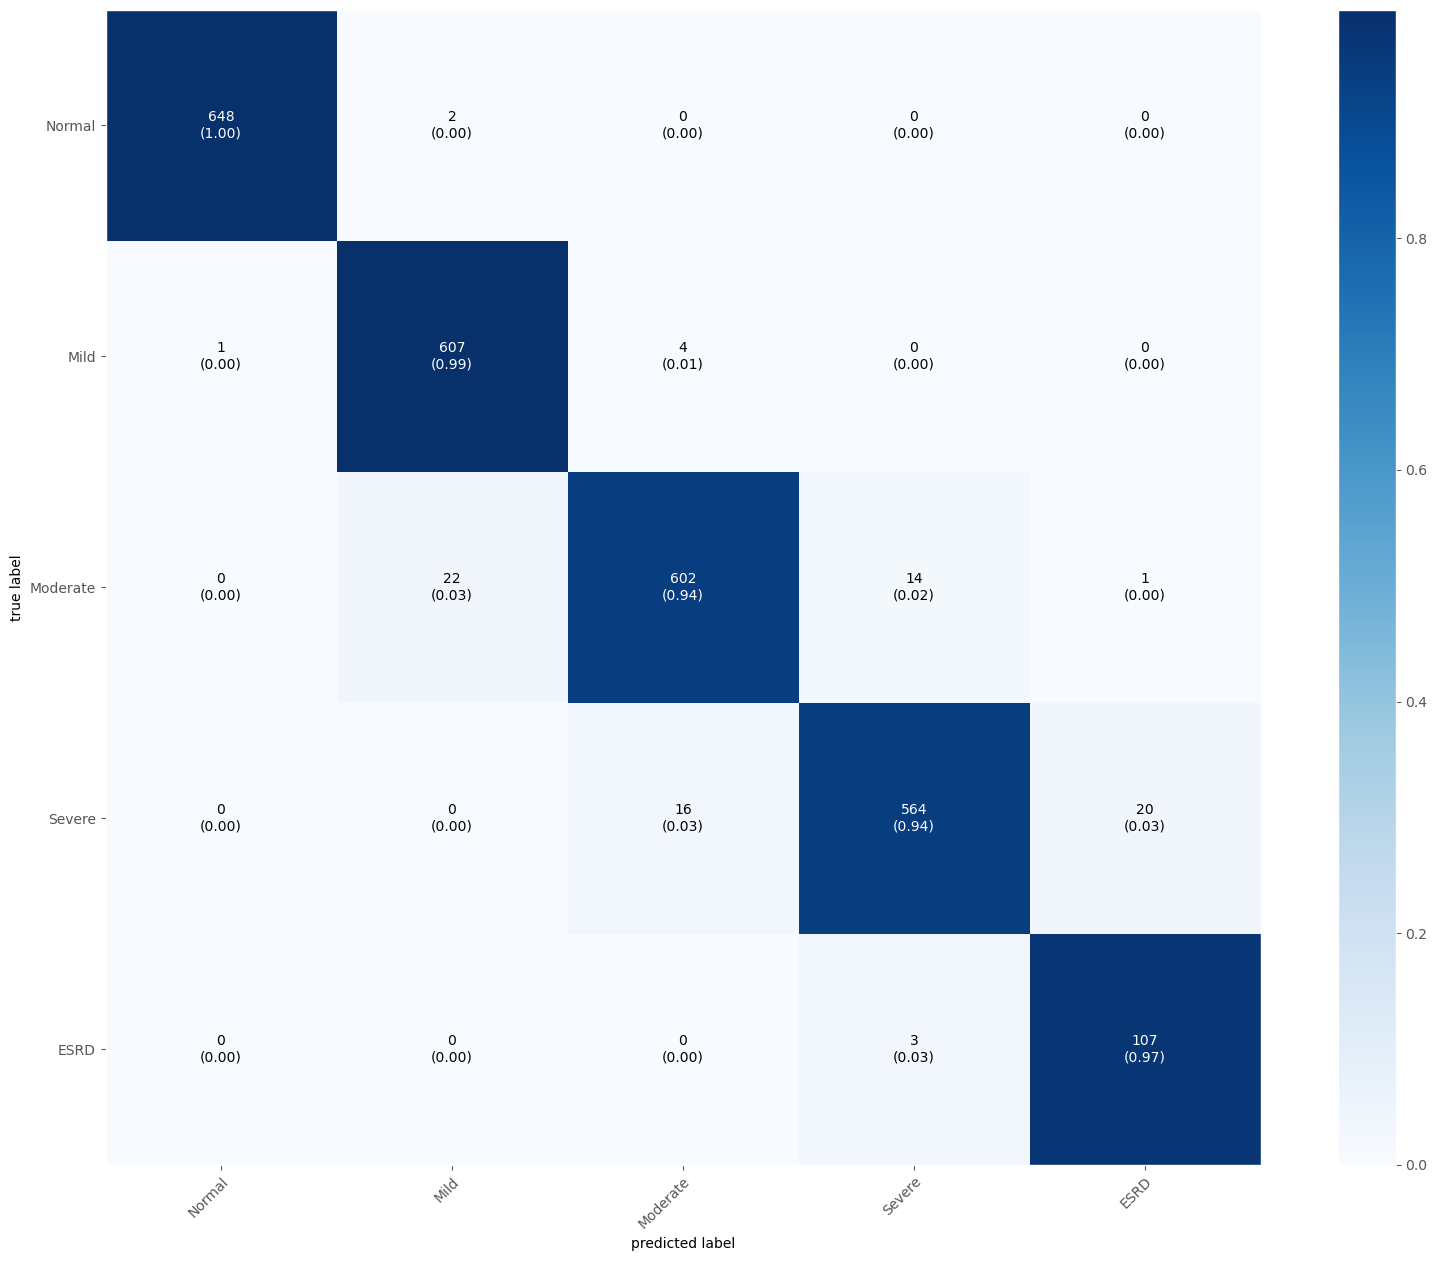

In [224]:
cf_matrix = confusion_matrix(y_test, y_pred)
class_names=['Normal','Mild','Moderate','Severe','ESRD']
fig, ax = plot_confusion_matrix(conf_mat=cf_matrix,
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True,
                               class_names=class_names)
plt.show()

### Comparing Models
Let's compare the accuracy score of all the classifier models used above.

In [225]:
models = pd.DataFrame({
    'Model': [ 'Logistic Regression','Support Vector Machines', 
              'Decision Tree', 'Random Forest', 'Naive Bayes','KNN','CatBoost' ],
    'Score': [ acc_lr*100,acc_svc, 
              acc_dt, acc_rf, acc_nb,acc_knn,cb_accuracy*100]
    })
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,100.000000
6,CatBoost,99.846802
2,Decision Tree,99.750985
1,Support Vector Machines,98.017471
5,KNN,96.906424
4,Naive Bayes,93.697919
0,Logistic Regression,93.527384


# Save the best model

In [226]:
import pickle

In [227]:
Best_Model = max(BestModelList)

In [228]:
if Best_Model==acc_lr:
    Best_Model=lr_grid
elif Best_Model==acc_svc:
    Best_Model=svm_grid
elif Best_Model==acc_rf:
    Best_Model=rf_grid
elif Best_Model==acc_dt:
    Best_Model=dt_grid
elif Best_Model==acc_nb:
    Best_Model=nb_grid
elif Best_Model==acc_knn:
    Best_Model=knn_grid

In [229]:
# Best model
# save
pickle.dump( Best_Model, open( "web/RFModel.p", "wb" ) )

# loading
model1 = pickle.load( open( "web/RFModel.p", "rb" ) )

In [230]:
# # CatBooost model
# # save
# pickle.dump( cat_model, open( "web/catboostModel.p", "wb" ) )

# # loading
# model2 = pickle.load( open( "web/catboostModel.p", "rb" ) )

In [231]:
 # x = np.array([73.0,  1.0130, 42,  1.9,33,  9,  3.3,  0, 42.97606721,0.0])

In [232]:
# loaded_model =  pickle.load( open( "web/bestModel.p", "rb" ) )
# result = loaded_model.predict([x])

In [233]:
# result[0]

In [234]:
def kidney(Blood_pressure, Specific_gravity, Albumin, Blood_urea, Serum_creatinine, Sodium,Packed_cell_volume, Red_blood_cell,Gender,GFR):
   
    gender=0
    if Gender=='Male':
        gender=0
    elif Gender=='Female':
        gender=1
    x = np.array([Blood_pressure, Specific_gravity, Albumin, Blood_urea, Serum_creatinine, Sodium,Packed_cell_volume, Red_blood_cell,
                  gender,GFR])
    loaded_model =  pickle.load( open( "web/RFModel.p", "rb" ) )
    prediction = loaded_model.predict(x.reshape(1, -1))
    
    Result=0
    if prediction[0]==1:
        Result = 'Normal'
    elif prediction[0]==2:
        Result='Mild'
    elif prediction[0]==3:
        Result='Moderate'
    elif prediction[0]==4:
        Result='Severe'
    elif prediction==5:
        Result='ESRD'

    return Result

In [235]:
outputs = gr.outputs.Textbox()
gender = {
    'Male':0,
    'Female':1
    
    }
app = gr.Interface(fn=kidney, inputs=['number','number','number','number','number','number','number','number',gr.inputs.Dropdown(choices=gender),'number'], outputs=outputs,description="This is a Kidney Stage prediction mode model")
app.launch(share=True)

Running on local URL:  http://127.0.0.1:7860

Could not create share link. Please check your internet connection or our status page: https://status.gradio.app.


Traceback (most recent call last):
  File "C:\Users\Wondosen T\anaconda3\lib\site-packages\gradio\routes.py", line 488, in run_predict
    output = await app.get_blocks().process_api(
  File "C:\Users\Wondosen T\anaconda3\lib\site-packages\gradio\blocks.py", line 1431, in process_api
    result = await self.call_function(
  File "C:\Users\Wondosen T\anaconda3\lib\site-packages\gradio\blocks.py", line 1109, in call_function
    prediction = await anyio.to_thread.run_sync(
  File "C:\Users\Wondosen T\anaconda3\lib\site-packages\anyio\to_thread.py", line 28, in run_sync
    return await get_asynclib().run_sync_in_worker_thread(func, *args, cancellable=cancellable,
  File "C:\Users\Wondosen T\anaconda3\lib\site-packages\anyio\_backends\_asyncio.py", line 818, in run_sync_in_worker_thread
    return await future
  File "C:\Users\Wondosen T\anaconda3\lib\site-packages\anyio\_backends\_asyncio.py", line 754, in run
    result = context.run(func, *args)
  File "C:\Users\Wondosen T\anaconda3\li